# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [3]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017.shape #looked at the shape of the dataframe to get an understaning of its size.

(51, 5)

In [6]:
act_2017.shape #looked at the shape of the dataframe to get an understaning of its size.

(52, 7)

In [7]:
sat_2017.info() #ran info look for nulls and see type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act_2017.info() #ran info look for nulls and see type of each 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [9]:
sat_2017.describe() #ran describe to see if there might be anomalies in the data

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
act_2017.describe() #ran describe to see if there might be anomalies in the data

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  The data is contained in two files, one for the SAT's and one for the ACT's.  The data itself is are average test scores and participation rates of high school seniors by state.  Specifically, the SAT data contains scores for the math and reading sections along with total scores.  The ACT data are scores for the English, math, reading, science and composite or total scores.  The SAT file has 51 rows and 5 columns while the ACT file has 52 rows and 7 columns.

#### 4a. Does the data look complete? 

Answer:  The data appears to be complete though the ACT data contains an extra Nation data row.  There are no null or Nan values in the data.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**



Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The minimum score that a student can receive on the SAT is 400 with a maximum of 1600.  The SAT is divided into two section, each having minimums and maximums of 200 and 800, respectively.  Currently, the SAT data is showing a minimum of 52 for the math section which is well outside of the range of possible values.  This is coming from a bad value in row 20, which is the state of Maryland.  The correct value should be 524 per the website data.

The ACT scores can range from 1 to 36 on a composite score.  The composite score is found by averaging each of the four sections.  The Science column is showing a minimum value of 2.3 which looked low.  This is coming from row 21, again the State of Maryland.  The correct value should be 23.2 per the website data.

In [11]:
sat_2017[(sat_2017['Math'] < 200)] #look for which column had an anomaly

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
act_2017[act_2017['Science'] == 2.3] #look for which column had an anomaly

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [13]:
#corrected the issues I found
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 23.2
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524

In [14]:
sat_2017.describe() #ran describe to make sure my changes worked

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [15]:
act_2017.describe() #ran describe to make sure my changes worked

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The Participation column in both of the files is an object and should be a number.  The Composite column in the ACT file is also an object and should be a number. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
#based on code from Will Sutton's example
sat_tmp_col = sat_2017['Participation'] #moved participation to a temporay variable
act_tmp_col = act_2017['Participation']

def remove_percent (p): #created function to remove %
    return p.replace('%','')

sat_tmp_col = sat_tmp_col.apply(remove_percent, convert_dtype=True) #ran function
act_tmp_col = act_tmp_col.apply(remove_percent, convert_dtype=True)

sat_tmp_col = sat_tmp_col.astype('int') #set data type to interger from object
act_tmp_col = act_tmp_col.astype('int')

sat_2017['Participation'] = sat_tmp_col #returned fixed columns to dataframe
act_2017['Participation'] = act_tmp_col

In [19]:
sat_2017.dtypes #ran dtypes to make sure changes took

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [20]:
act_2017.dtypes #ran dtypes to make sure changes took

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
act_2017 #ran to find which column was causing Composite to be a string value

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8
6,Colorado,100,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2
8,Delaware,18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2


In [22]:
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] = 20.2 #fixed bad value

In [23]:
act_2017.loc[act_2017['State'] == 'Wyoming'] #ran to see if changes took

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2


In [24]:
act_2017.dtypes #ran to check data types

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [25]:
act_tmp_col = act_2017['Composite'] #changing column to float from object
act_tmp_col = act_tmp_col.astype('float')
act_2017['Composite'] = act_tmp_col

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
act_2017.dtypes 

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [27]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

- Display the data types again to confirm they are correct.

In [28]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [29]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [6]:
#remaned columns
sat_2017.rename(columns = {'State':'state', 'Participation':'sat_participation_2017',
                           'Evidence-Based Reading and Writing':'sat_reading_2017',
                           'Math':'sat_math_2017', 'Total':'sat_total_2017'}, inplace = True)
act_2017.rename(columns = {'State':'state', 'Participation':'act_participation_2017',
                           'English':'act_english_2017', 'Math':'act_math_2017', 'Reading':'act_reading_2017',
                           'Science':'act_science_2017', 'Composite':'act_composite_2017'}, inplace = True)

In [31]:
act_2017.head() #see if changes worked

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [32]:
sat_2017.head() #see if changes worked

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

_**Data Dictionary**_

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT/SAT|US State where the exam was given| 
|**sat_participation_2017**|*int*|SAT|Percent of high school seniors in the state who took the exam in 2017|
|**sat_reading_2017**|*int*|SAT|Average reading score in the state for 2017.  The values of score can between 200 and 800.|
|**sat_math_2017**|*int*|SAT|Average math score in the state for 2017.  The values of score can between 200 and 800.|
|**sat_total_2017**|*int*|SAT|Average total score in the state for 2017.  The values of score can between 400 and 1600.|
|**sat_participation_2018**|*int*|SAT|Percent of high school seniors in the state who took the exam in 2018|
|**sat_reading_2018**|*int*|SAT|Average reading score in the state for 2018.  The values of score can between 200 and 800.|
|**sat_math_2018**|*int*|SAT|Average math score in the state for 2018.  The values of score can between 200 and 800.|
|**sat_total_2018**|*int*|SAT|Average total score in the state for 2018.  The values of score can between 400 and 1600.|
|**act_participation_2017**|*int*|ACT|Percent of high school seniors in the state who took the exam in 2017|
|**act_english_2017**|*float*|ACT|Average English score in the state for 2017.  The values of score can between 1 and 36.|
|**act_math_2017**|*float*|ACT|Average math score in the state for 2017.  The values of score can between 1 and 36.|
|**act_reading_2017**|*float*|ACT|Average reading score in the state for 2017.  The values of score can between 1 and 36.|
|**act_science_2017**|*float*|ACT|Average science score in the state for 2017.  The values of score can between 1 and 36.|
|**act_composite_2017**|*float*|ACT|Average composite or total score in the state for 2017.  The values of score can between 1 and 36.|
|**act_participation_2018**|*int*|ACT|Percent of high school seniors in the state who took the exam in 2018|
|**act_composite_2018**|*float*|ACT|Average composite or total score in the state for 2018.  The values of score can between 1 and 36.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [33]:
act_2017.drop([0], axis = 0, inplace=True) #remove the Nationwide row from the ACT data

In [34]:
act_2017.info() #check if column was removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
state                     51 non-null object
act_participation_2017    51 non-null int64
act_english_2017          51 non-null float64
act_math_2017             51 non-null float64
act_reading_2017          51 non-null float64
act_science_2017          51 non-null float64
act_composite_2017        51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [7]:
combined_2017 = pd.merge(sat_2017, act_2017, on='state')
combined_2017.head() #see if merge worked

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,5%,593,572,1165,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,38%,547,533,1080,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,30%,563,553,1116,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3%,614,594,1208,100%,18.9,19.0,19.7,19.5,19.4
4,California,53%,531,524,1055,31%,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
combined_2017.to_csv('./combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [10]:
sat_2018 = pd.read_csv('../data/SAT2018_Testing _Data.csv')
act_2018 = pd.read_csv('../data/ACT2018_Testing _Data.csv')

In [38]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [39]:
act_2018.drop([20], axis = 0, inplace=True) #remove duplicate Maine row

In [40]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null object
Composite        51 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [41]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [42]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [43]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [44]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [45]:
#change Participation column type
#based on code from Will Sutton's example
sat_tmp_col = sat_2018['Participation']
act_tmp_col = act_2018['Participation']

def remove_percent (p):
    return p.replace('%','')

sat_tmp_col = sat_tmp_col.apply(remove_percent, convert_dtype=True)
act_tmp_col = act_tmp_col.apply(remove_percent, convert_dtype=True)

sat_tmp_col = sat_tmp_col.astype('int')
act_tmp_col = act_tmp_col.astype('int')

sat_2018['Participation'] = sat_tmp_col
act_2018['Participation'] = act_tmp_col

In [46]:
act_2018.dtypes

State             object
Participation      int64
Composite        float64
dtype: object

In [47]:
sat_2018.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
#renamed columns like above
sat_2018.rename(columns = {'State':'state', 'Participation':'sat_participation_2018',
                           'Evidence-Based Reading and Writing':'sat_reading_2018',
                           'Math':'sat_math_2018', 'Total':'sat_total_2018'}, inplace = True)
act_2018.rename(columns = {'State':'state', 'Participation':'act_participation_2018',
                           'Composite':'act_composite_2018'}, inplace = True)

In [49]:
sat_2018.head() #see if change worked

,state,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [50]:
act_2018.head() #see if change worked

,state,act_participation_2018,act_composite_2018
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [12]:
combined_2018 = pd.merge(sat_2018, act_2018, on='state')

In [13]:
final = pd.merge(combined_2017, combined_2018, on='state')
final.head()

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5%,593,572,1165,100%,18.9,18.4,19.7,19.4,19.2,6%,595,571,1166,100%,19.1
1,Alaska,38%,547,533,1080,65%,18.7,19.8,20.4,19.9,19.8,43%,562,544,1106,33%,20.8
2,Arizona,30%,563,553,1116,62%,18.6,19.8,20.1,19.8,19.7,29%,577,572,1149,66%,19.2
3,Arkansas,3%,614,594,1208,100%,18.9,19.0,19.7,19.5,19.4,5%,592,576,1169,100%,19.4
4,California,53%,531,524,1055,31%,22.5,22.7,23.1,22.2,22.8,60%,540,536,1076,27%,22.7


In [53]:
final.to_csv('./final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [54]:
final.describe()

,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,38.600000,570.860000,558.660000,1129.620000,65.920000,20.862000,21.13600,21.956000,21.410000,21.466000,44.820000,565.020000,557.760000,1122.880000,62.320000,21.454000
std,34.560211,44.385146,45.839832,89.913085,32.110676,2.324307,1.97399,2.046317,1.731962,2.004241,37.097604,47.010416,46.987432,92.845634,34.114118,2.111312
min,2.000000,503.000000,492.000000,996.000000,8.000000,16.300000,18.00000,18.100000,18.200000,17.800000,2.000000,480.000000,486.000000,998.000000,7.000000,17.700000
25%,4.000000,535.250000,524.000000,1057.000000,31.000000,19.000000,19.40000,20.425000,19.925000,19.800000,4.250000,535.000000,524.250000,1062.250000,27.750000,19.925000
50%,34.000000,559.500000,549.500000,1107.500000,71.000000,20.550000,20.90000,21.700000,21.300000,21.400000,50.000000,552.000000,545.500000,1098.500000,66.000000,21.050000
75%,65.000000,613.500000,601.000000,1214.000000,100.000000,23.100000,23.00000,23.875000,22.975000,23.400000,74.500000,612.750000,594.250000,1207.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [55]:
dict = {}
def st_dev(df, column_name):
    stan_d=(sum((df[column_name] - 
        df[column_name].mean()) ** 2))/((len(df[column_name])))
    stan_d = stan_d ** 0.5
    print(stan_d)
st_dev(final,'sat_participation_2017')

34.21286307808804


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [56]:
sd = {c:st_dev(final,c) for c in final.columns[1:]}

34.21286307808804
43.9390532442382
45.37911854586864
89.00941298536914
31.787947401491657
2.3009467616613812
1.9541504548012678
2.025750231395766
1.7145553359399048
1.9840977798485642
36.72475459414263
46.537937212558106
46.51518461749884
91.91248881408882
33.7712540483767
2.090091864009809


In [57]:
print('sat_participation_2017 standard deviation ', np.std(final['sat_participation_2017']))
print('sat_reading_2017 standard deviation ', np.std(final['sat_reading_2017']))
print('sat_math_2017 standard deviation ', np.std(final['sat_math_2017']))
print('sat_total_2017 standard deviation ', np.std(final['sat_total_2017']))
print('act_participation_2017 standard deviation ', np.std(final['act_participation_2017']))
print('act_english_2017 standard deviation ', np.std(final['act_english_2017']))
print('act_math_2017 standard deviation ', np.std(final['act_math_2017']))
print('act_reading_2017 standard deviation ', np.std(final['act_reading_2017']))
print('act_science_2017 standard deviation ', np.std(final['act_science_2017']))
print('act_composite_2017 standard deviation ', np.std(final['act_composite_2017']))
print('sat_participation_2018 standard deviation ', np.std(final['sat_participation_2018']))
print('sat_reading_2018 standard deviation ', np.std(final['sat_reading_2018']))
print('sat_math_2018 standard deviation ', np.std(final['sat_math_2018']))
print('sat_total_2018 standard deviation ', np.std(final['sat_total_2018']))
print('act_participation_2018 standard deviation ', np.std(final['act_participation_2018']))
print('act_composite_2018 standard deviation ', np.std(final['act_composite_2018']))

sat_participation_2017 standard deviation  34.21286307808804
sat_reading_2017 standard deviation  43.9390532442382
sat_math_2017 standard deviation  45.37911854586864
sat_total_2017 standard deviation  89.00941298536914
act_participation_2017 standard deviation  31.787947401491657
act_english_2017 standard deviation  2.3009467616613812
act_math_2017 standard deviation  1.9541504548012678
act_reading_2017 standard deviation  2.025750231395766
act_science_2017 standard deviation  1.7145553359399048
act_composite_2017 standard deviation  1.9840977798485642
sat_participation_2018 standard deviation  36.72475459414263
sat_reading_2018 standard deviation  46.537937212558106
sat_math_2018 standard deviation  46.51518461749884
sat_total_2018 standard deviation  91.91248881408882
act_participation_2018 standard deviation  33.7712540483767
act_composite_2018 standard deviation  2.090091864009809


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The manually calculated standard deviations do not match those from the describe method.  The manually calculated numbers do match the Numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?  
    - 2018 SAT?  
    - 2017 ACT?  
    - 2018 ACT?  
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?  
    - 2018 SAT?  
    - 2017 ACT?  
    - 2018 ACT?  
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?
Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.  

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [58]:
final.sort_values(by = 'sat_participation_2017', ascending = False).head(3)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
21,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,22,24.2
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8


In [59]:
final.sort_values(by = 'sat_participation_2017').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
33,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,98,20.3


North Dakota has the lowest SAT participation rate for 2017 while Michigan, Connecticut and Delaware all have 100% participation.

In [60]:
final.sort_values(by = 'sat_participation_2018', ascending = False).head(5)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,30,23.9
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8
21,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,22,24.2
11,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,36,22.3


In [61]:
final.sort_values(by = 'sat_participation_2018').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
33,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,98,20.3


North Dakota has the lowest SAT participation rate for 2018 while Colorado, Connecticut, Delaware, Michigan and Idaho had the highest.

In [62]:
final.sort_values(by = 'act_participation_2017', ascending = False).head(17)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
16,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
48,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5
43,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,480,530,1010,100,20.4
41,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,100,19.6
39,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,100,18.3
35,Oklahoma,7,530,517,1047,100,18.5,18.8,20.1,19.6,19.4,8,541,521,1062,100,19.3
32,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,52,554,543,1098,100,19.1
27,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7
24,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,629,1262,100,20.0


In [63]:
final.sort_values(by = 'act_participation_2017').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
18,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,24.0


Maine has the lowest ACT participation rate in 2017 while multiple states had 100% participation rates.

In [64]:
final.sort_values(by = 'act_participation_2018', ascending = False).head(17)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
16,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
48,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5
43,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,480,530,1010,100,20.4
41,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,100,19.6
39,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,100,18.3
35,Oklahoma,7,530,517,1047,100,18.5,18.8,20.1,19.6,19.4,8,541,521,1062,100,19.3
34,Ohio,12,578,570,1149,75,21.2,21.6,22.5,22.0,22.0,18,552,547,1099,100,20.3
32,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,52,554,543,1098,100,19.1
27,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7


In [65]:
final.sort_values(by = 'act_participation_2018').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
18,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,24.0


Maine has the lowest ACT participation rate in 2018 while multiple states had 100% participation rates.

In [66]:
final.sort_values(by = 'sat_total_2017', ascending = False).head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
22,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,99,21.3


In [67]:
final.sort_values(by = 'sat_total_2017').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8


In 2017, Minnesota had the highest mean total SAT score while Delaware had the lowest.

In [68]:
final.sort_values(by = 'sat_total_2018', ascending = False).head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
22,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,99,21.3


In [69]:
final.sort_values(by = 'sat_total_2018').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8


In 2018, Minnesota had the highest mean total SAT score while Delaware had the lowest.

In [70]:
final.sort_values(by = 'act_composite_2017', ascending = False).head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
28,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,16,25.1


In [71]:
final.sort_values(by = 'act_composite_2017').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
27,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7


New Hampshire had the highest ACT composite score in 2017 and Nevada had the lowest.

In [72]:
final.sort_values(by = 'act_composite_2018', ascending = False).head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,25.6


In [73]:
final.sort_values(by = 'act_composite_2018').head(1)

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
27,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7


Connecticut had the highest ACT composite score in 2017 and Nevada had the lowest.

In [19]:
final[final['sat_participation_2018'] == 100]

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018


All of the states with 100% SAT participation in 2017 also had 100% participation in 2018.

In [75]:
final[(final['act_participation_2017'] == 100) & (final['act_participation_2018'] != 100)]

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,30,23.9
22,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,99,21.3


For the ACT both Colorado and Minnesota had changes from 2017 to 2018.

In [76]:
final[(final['act_participation_2017'] > 50) & (final['sat_participation_2017'] > 50)]

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
8,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,56,550,549,1099,66,19.9
9,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,53,21.4
10,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,480,530,1010,89,18.9


Florida, Georgia and Hawaii had participation rates over 50% on both tests in 2017.

In [77]:
final[(final['sat_participation_2017'] > 50) & (final['sat_participation_2018'] > 50)]

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8
8,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,56,550,549,1099,66,19.9
9,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,53,21.4
10,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,480,530,1010,89,18.9
11,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,36,22.3
13,Indiana,63,542,532,1074,35,22.0,22.4,23.2,22.3,22.6,63,542,532,1074,32,22.5
18,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,24.0
19,Maryland,69,536,524,1060,28,23.3,23.1,24.2,23.2,23.6,76,545,535,1080,31,22.5


Florida, Georgia, Hawaii, North Carolina and South Carolina had participation rates over 50% on both tests in 2018.

Colorado is interesting because they had dramatic changes in their ACT participation rates from 2017 to 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

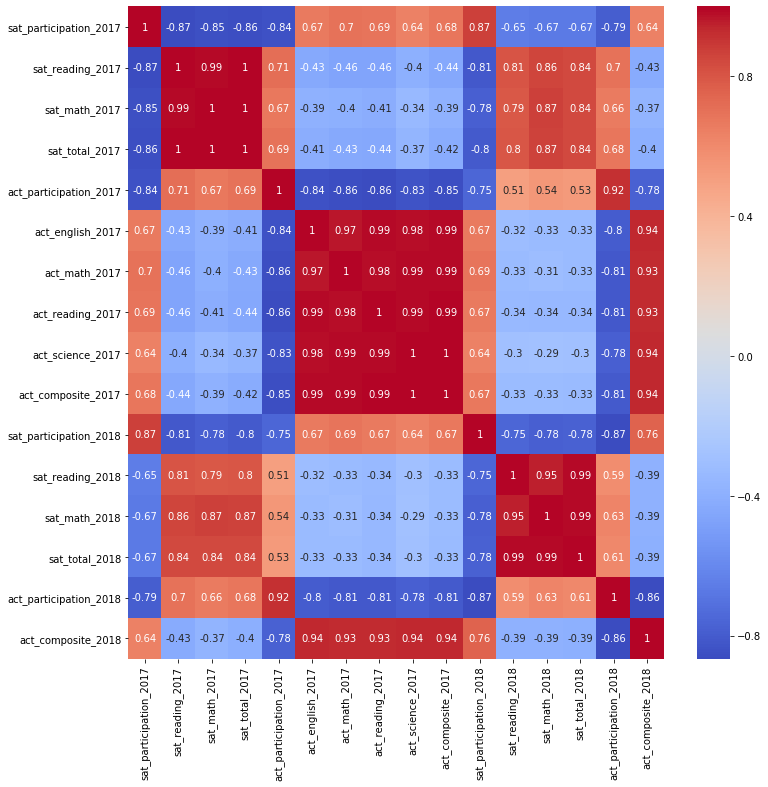

In [79]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(final.corr(),cmap='coolwarm', annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

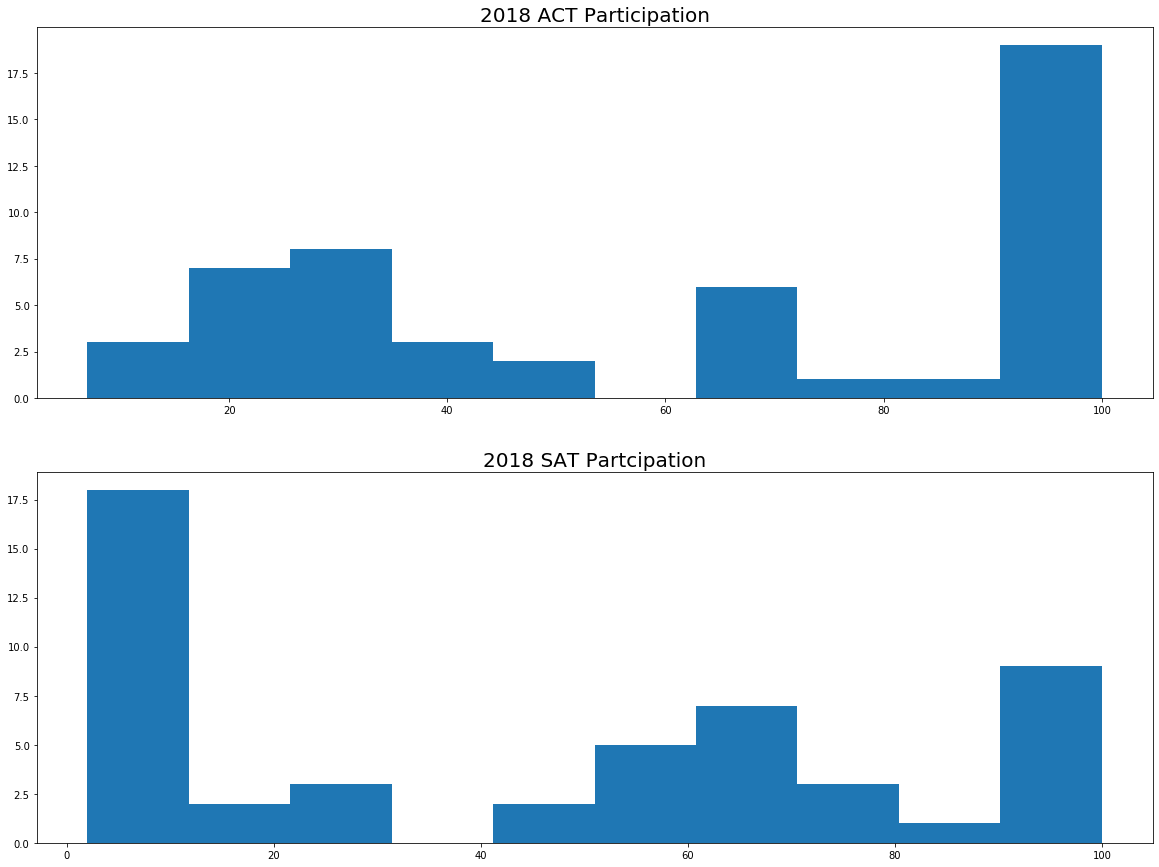

In [80]:
def f(t,s,x,y):
    plt.figure(figsize = (20,15))
    plt.subplot(211)
    plt.hist(t)
    plt.title(x, size = 20)
    plt.grid(False)
    
    plt.subplot(212)
    plt.hist(s);
    plt.title(y, size=20)
    plt.grid(False)
f(final['act_participation_2018'],final['sat_participation_2018'],'2018 ACT Participation','2018 SAT Partcipation')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

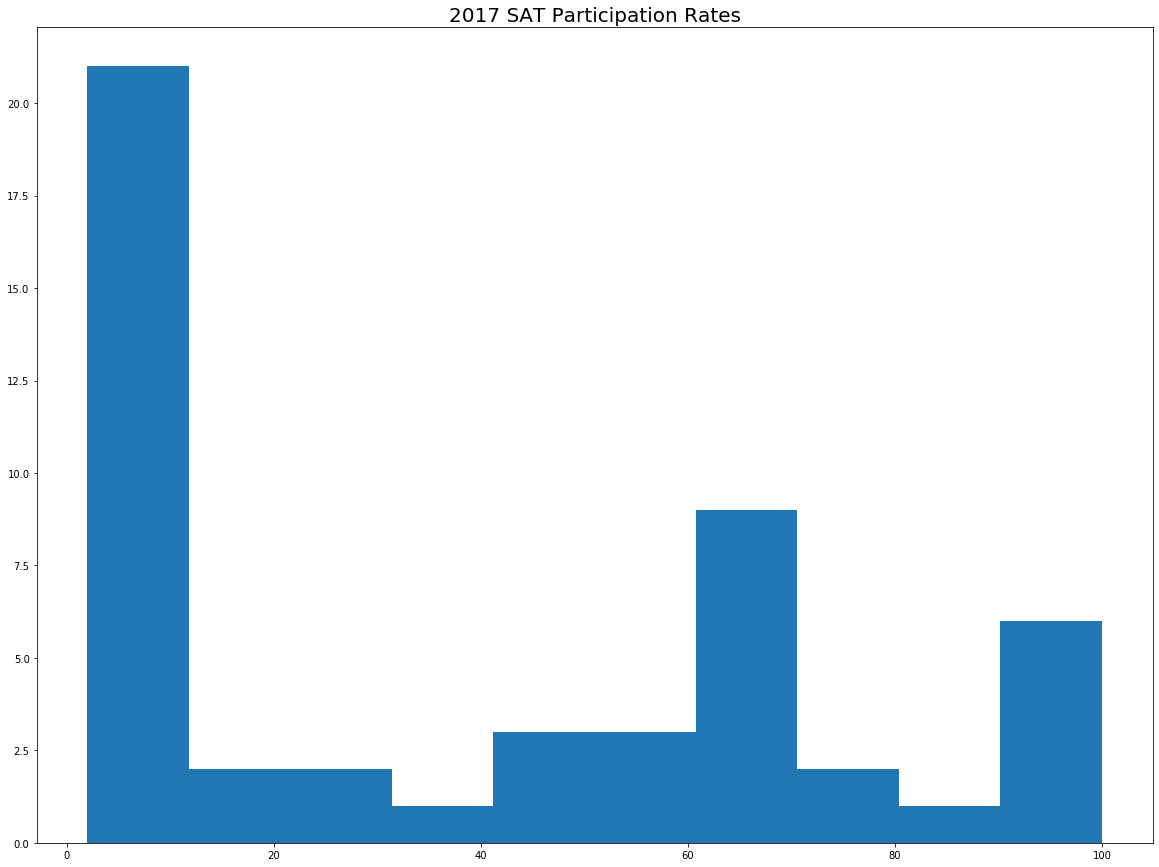

In [81]:
plt.figure(figsize = (20,15))
plt.hist(final['sat_participation_2017'])
plt.grid(False)
plt.title('2017 SAT Participation Rates', size = 20);

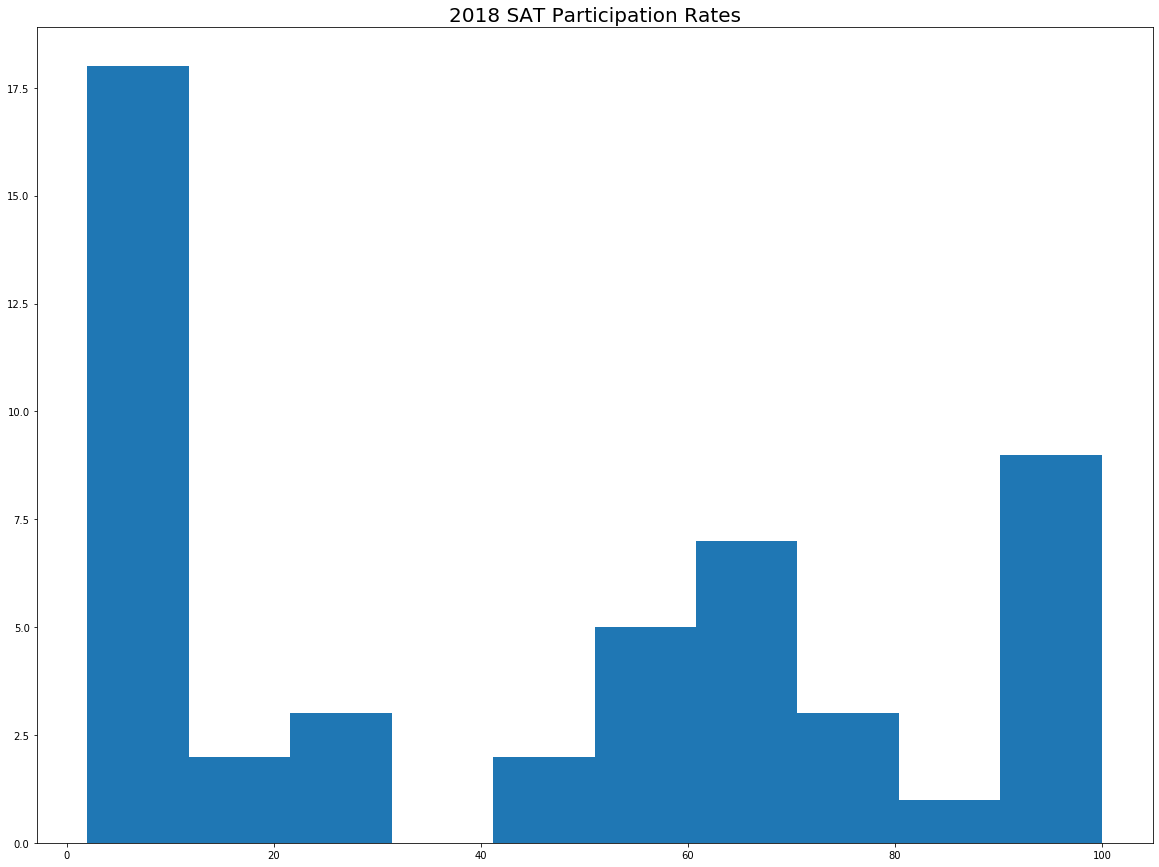

In [82]:
plt.figure(figsize = (20,15))
plt.hist(final['sat_participation_2018'])
plt.grid(False)
plt.title('2018 SAT Participation Rates', size =20);

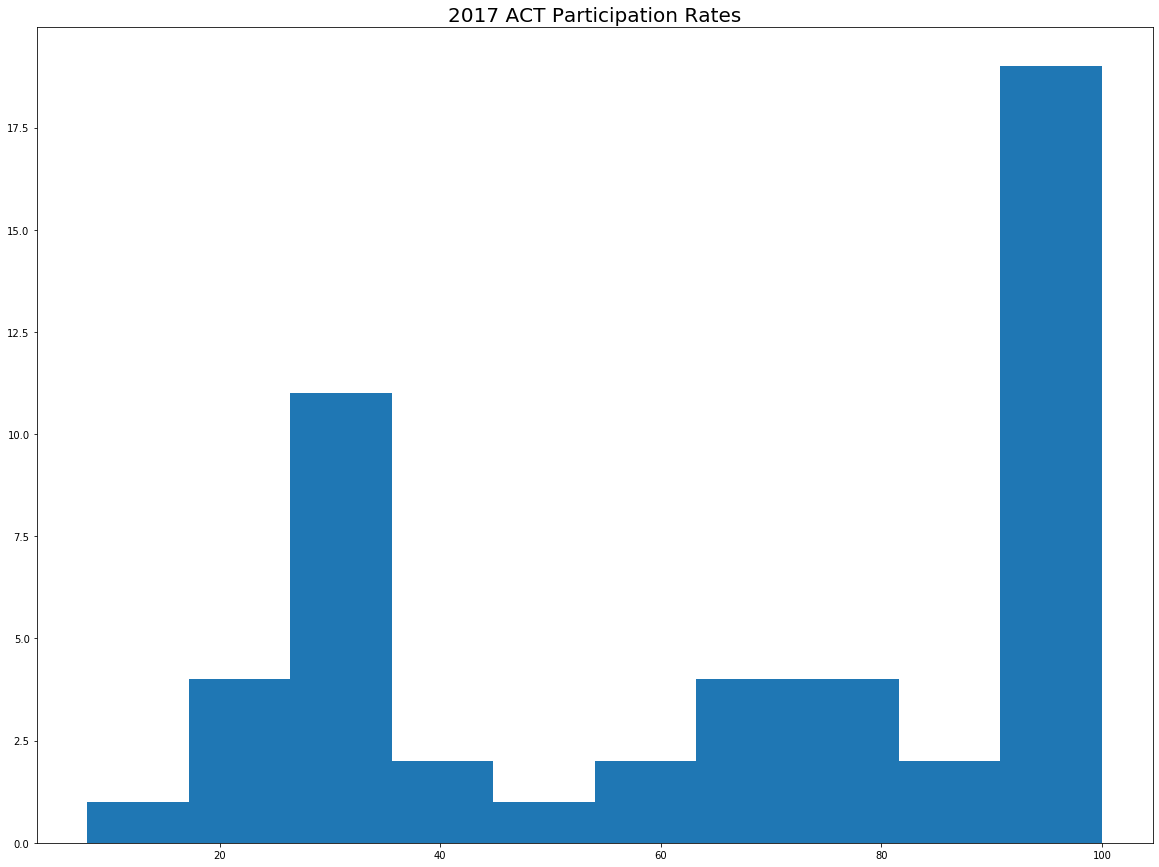

In [83]:
plt.figure(figsize = (20,15))
plt.hist(final['act_participation_2017'])
plt.grid(False)
plt.title('2017 ACT Participation Rates',size=20);

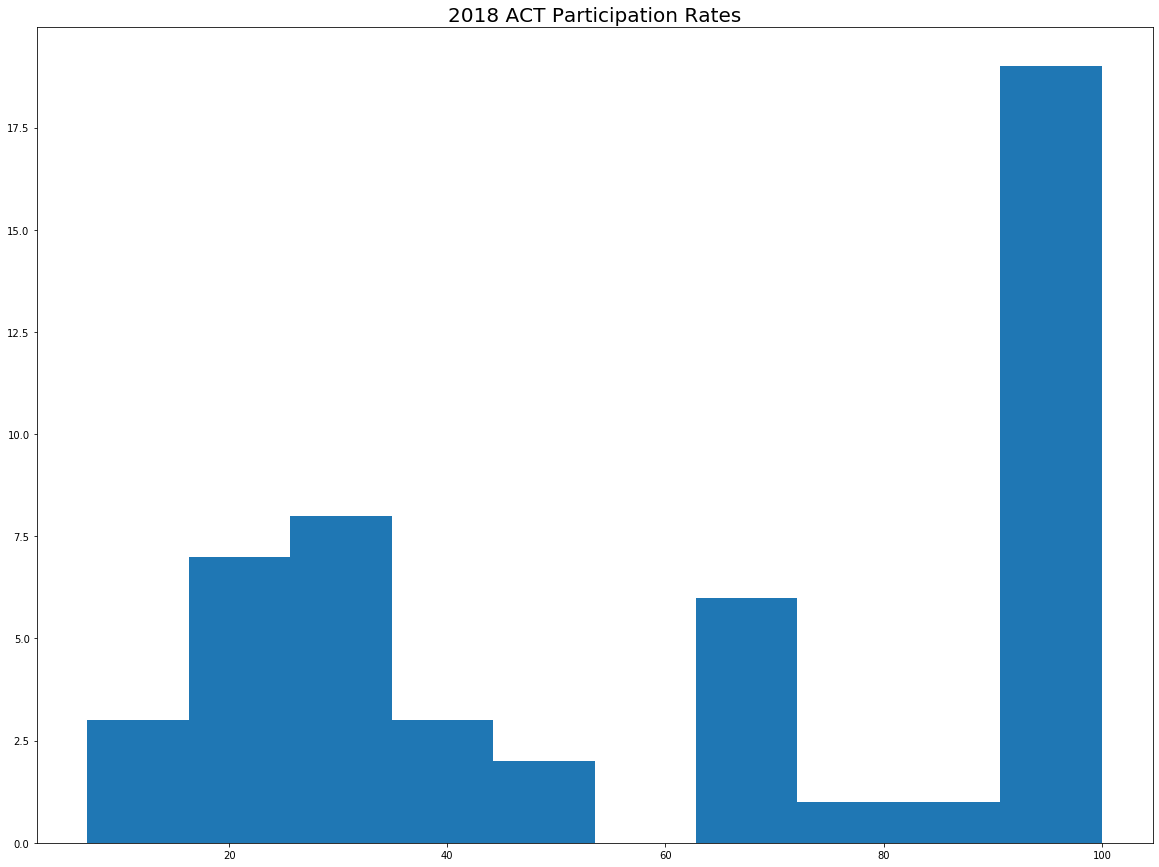

In [84]:
plt.figure(figsize = (20,15))
plt.hist(final['act_participation_2018'])
plt.grid(False)
plt.title('2018 ACT Participation Rates',size = 20);

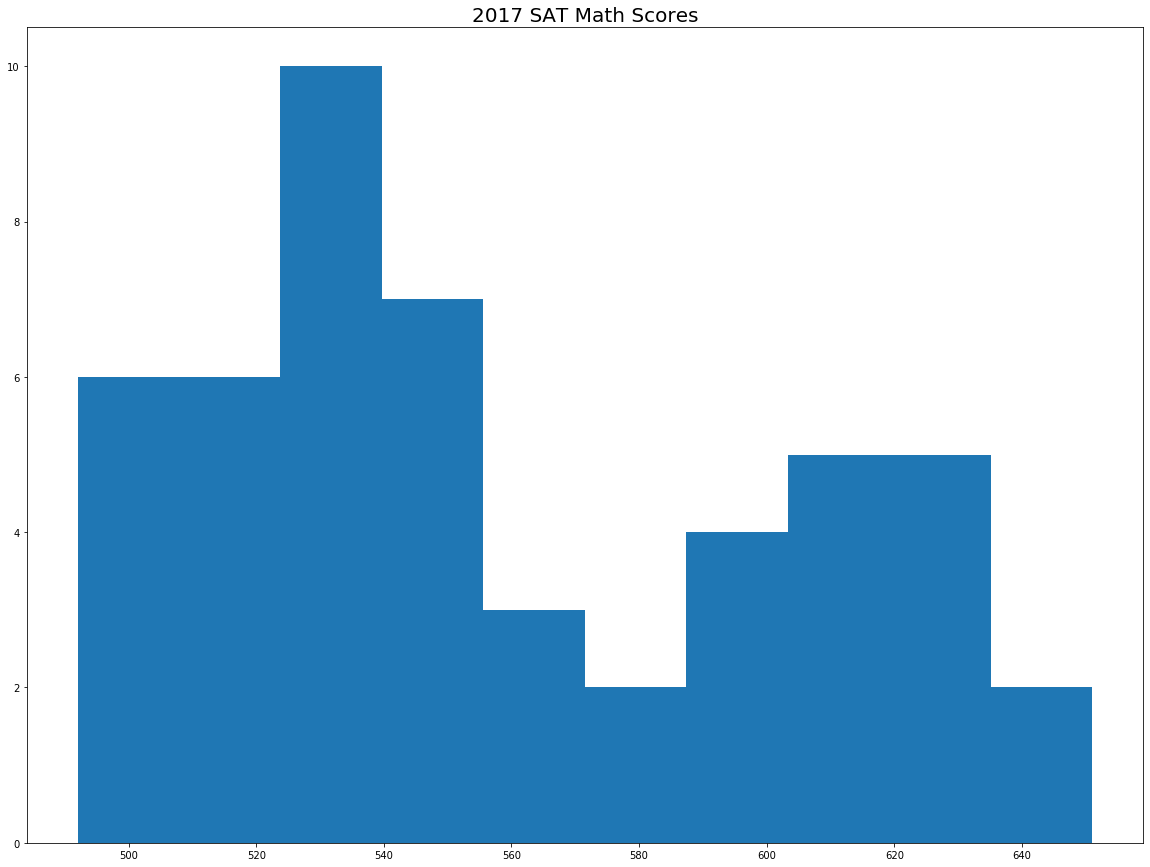

In [85]:
plt.figure(figsize = (20,15))
plt.hist(final['sat_math_2017'])
plt.grid(False)
plt.title('2017 SAT Math Scores',size=20);

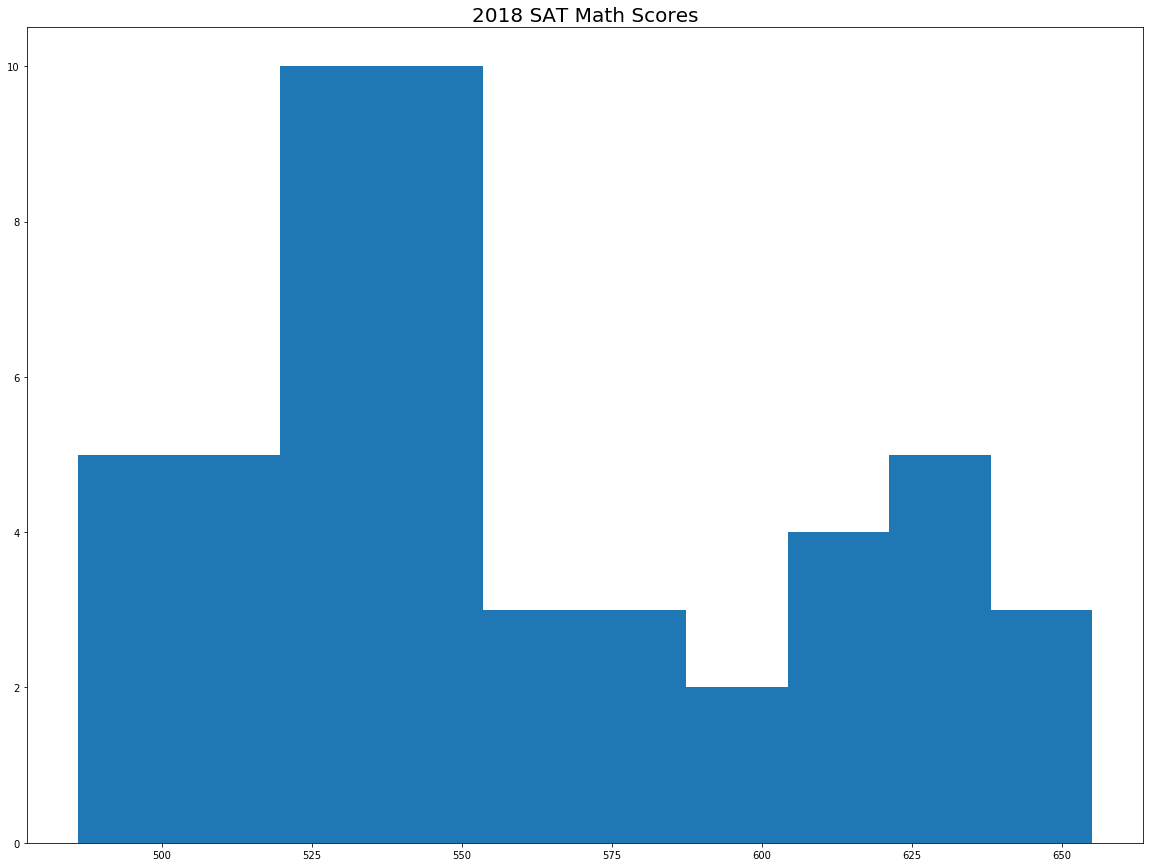

In [86]:
plt.figure(figsize = (20,15))
plt.hist(final['sat_math_2018'])
plt.grid(False)
plt.title('2018 SAT Math Scores',size=20);

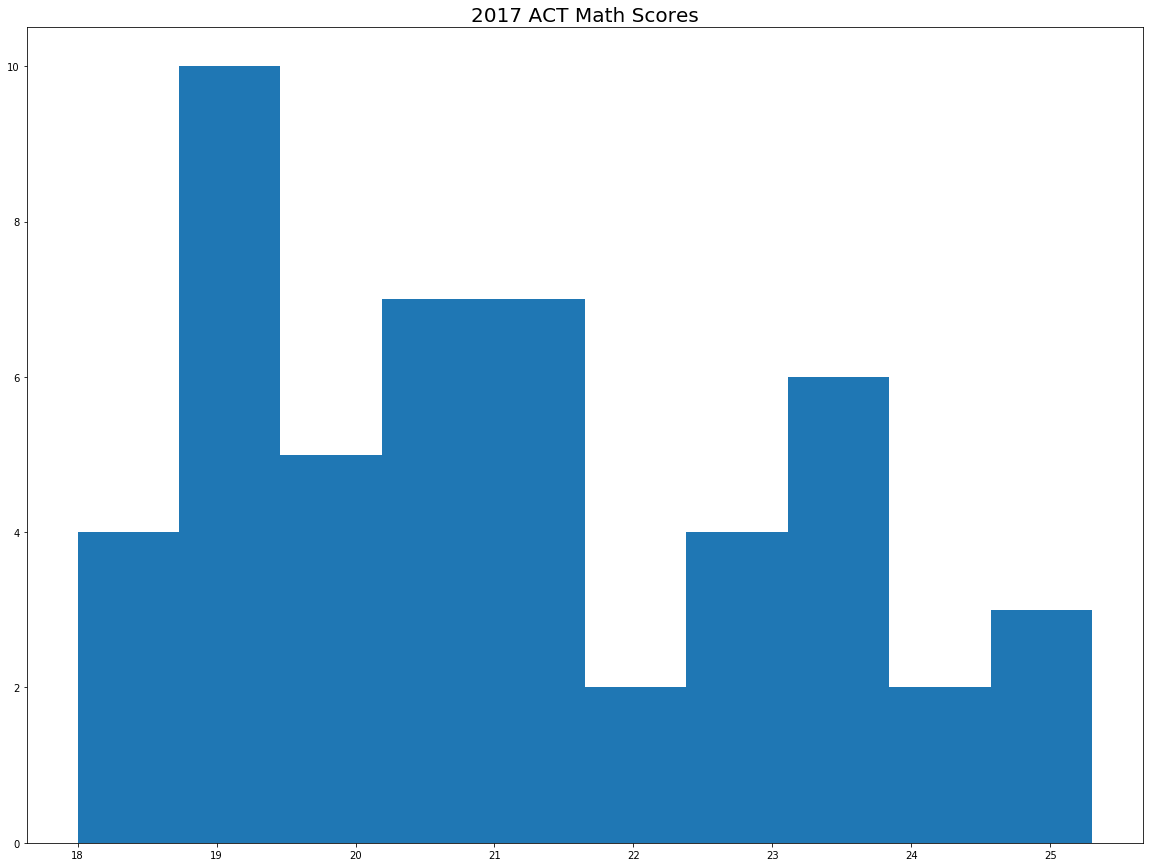

In [87]:
plt.figure(figsize = (20,15))
plt.hist(final['act_math_2017'])
plt.grid(False)
plt.title('2017 ACT Math Scores',size=20);

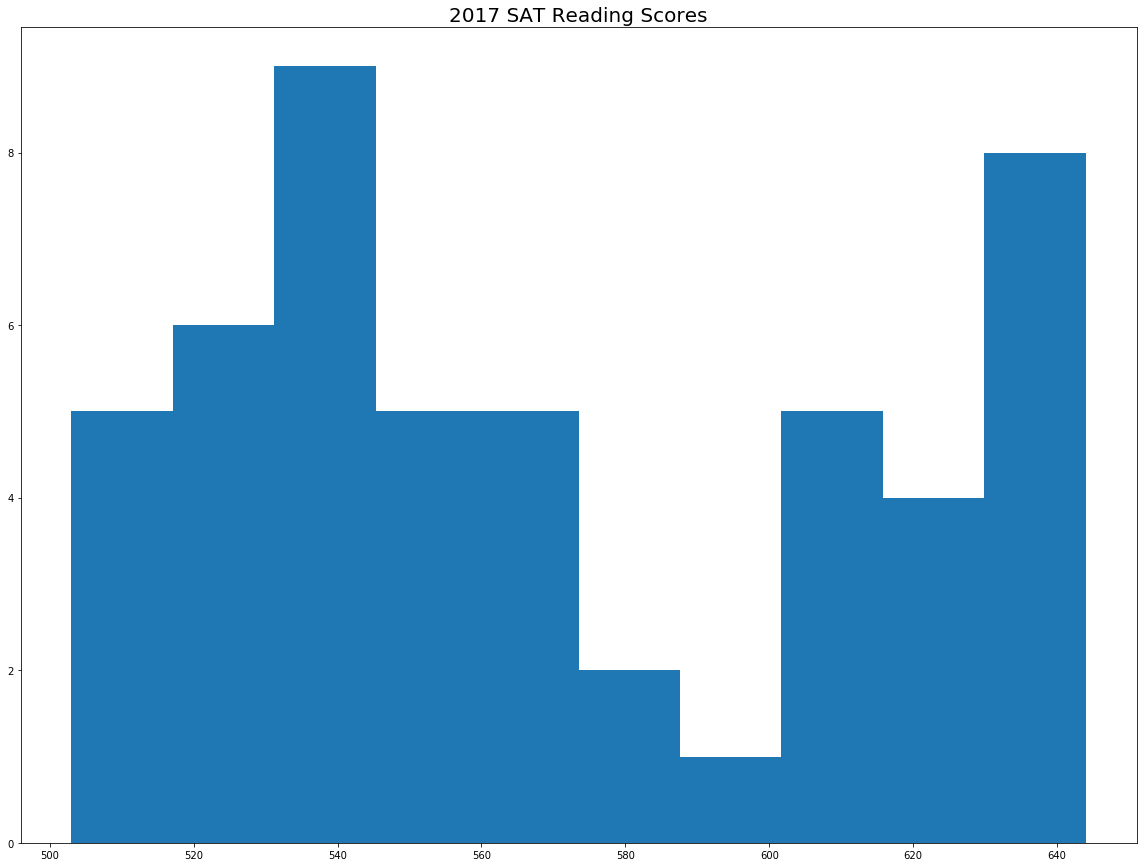

In [88]:
plt.figure(figsize = (20,15))
plt.hist(final['sat_reading_2017'])
plt.grid(False)
plt.title('2017 SAT Reading Scores',size=20);

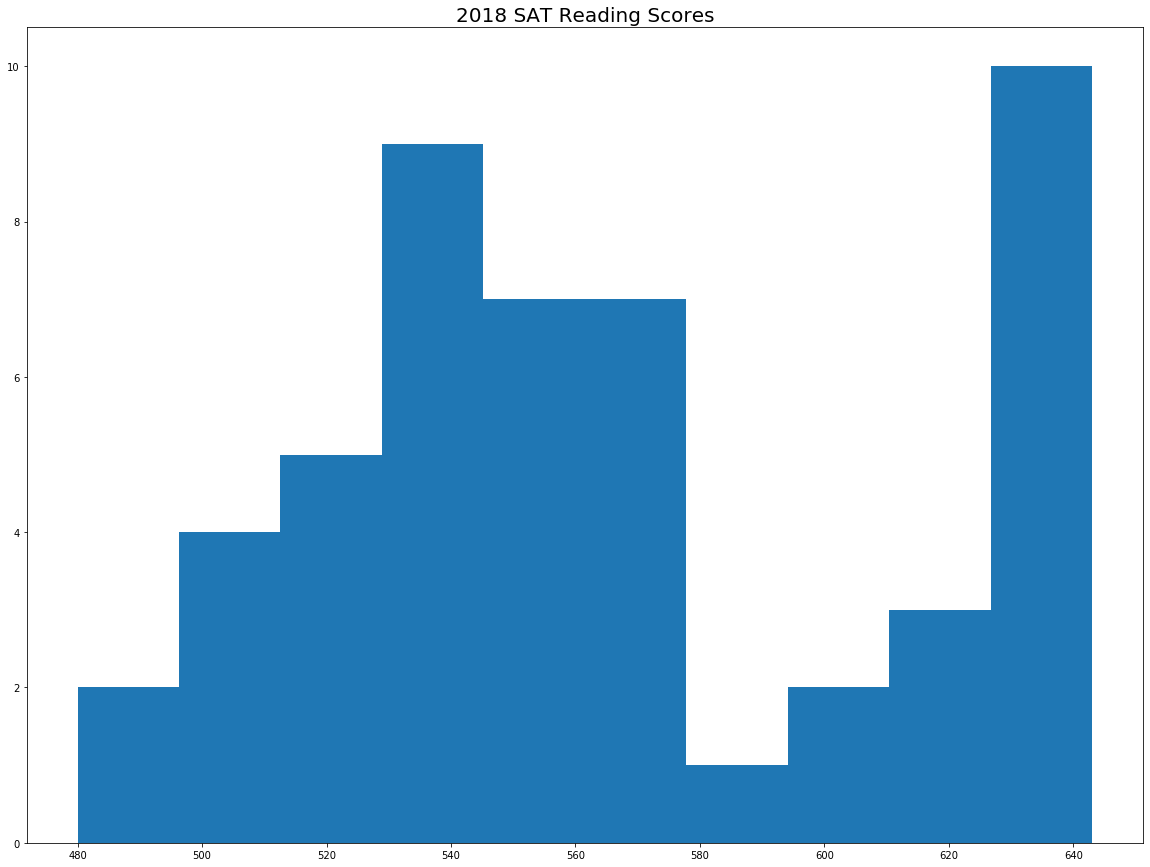

In [89]:
plt.figure(figsize = (20,15))
plt.hist(final['sat_reading_2018'])
plt.grid(False)
plt.title('2018 SAT Reading Scores',size=20);

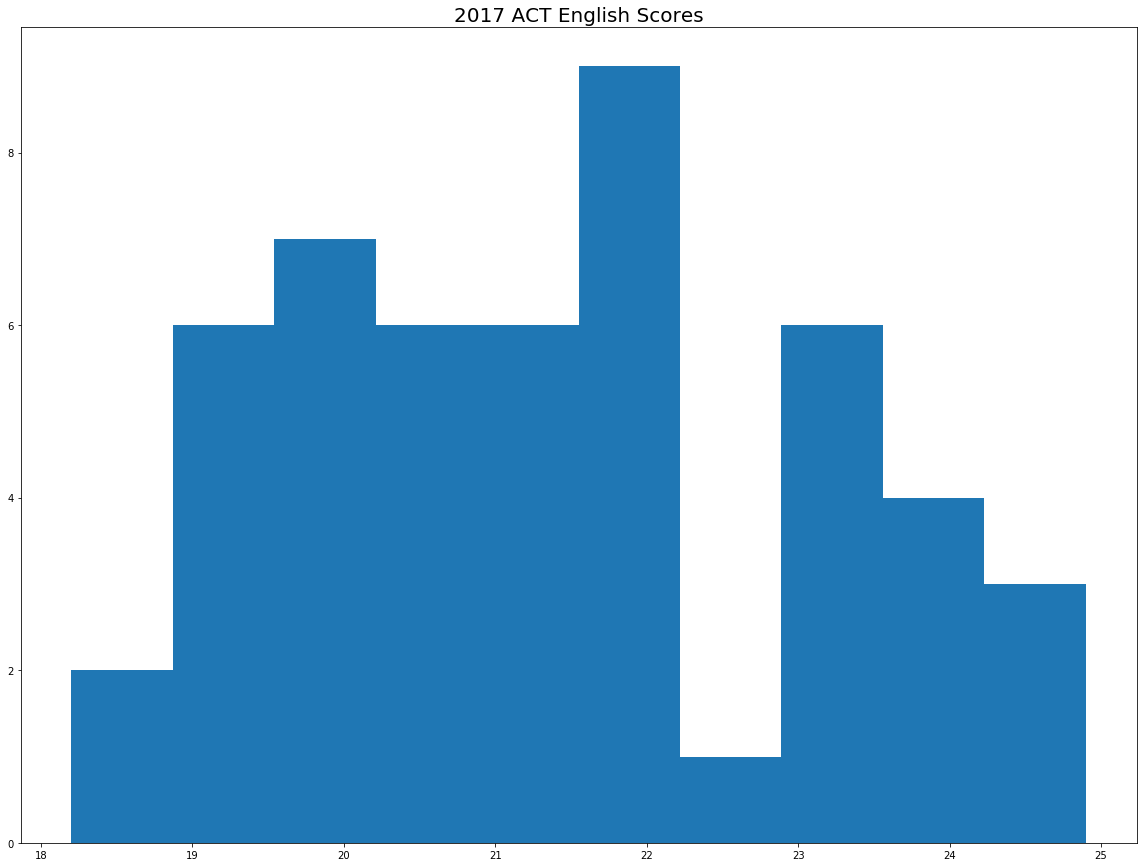

In [90]:
plt.figure(figsize = (20,15))
plt.hist(final['act_science_2017'])
plt.grid(False)
plt.title('2017 ACT English Scores',size=20);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


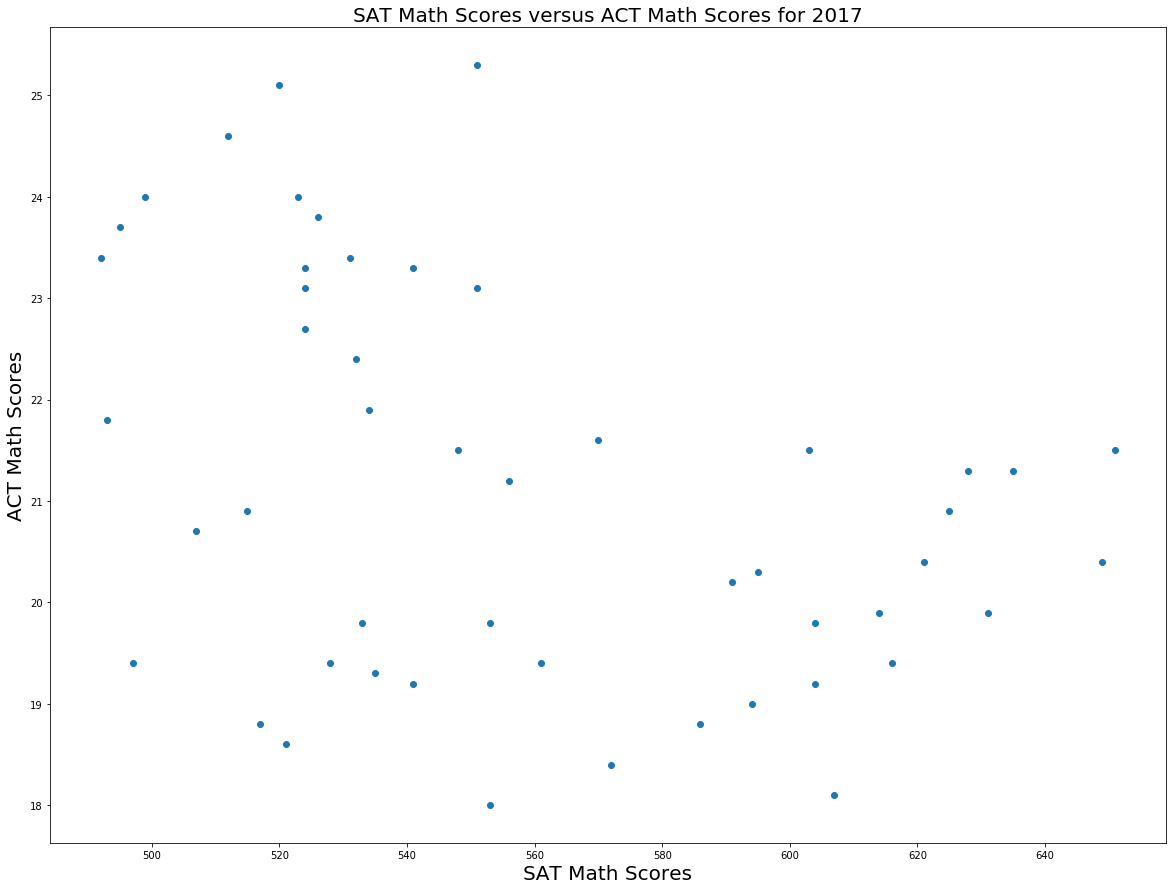

In [91]:
plt.figure(figsize = (20,15))


plt.scatter(final['sat_math_2017'],
           final['act_math_2017'])

plt.title("SAT Math Scores versus ACT Math Scores for 2017",size=20)
plt.ylabel("ACT Math Scores", fontsize = 20)
plt.xlabel("SAT Math Scores", fontsize = 20);

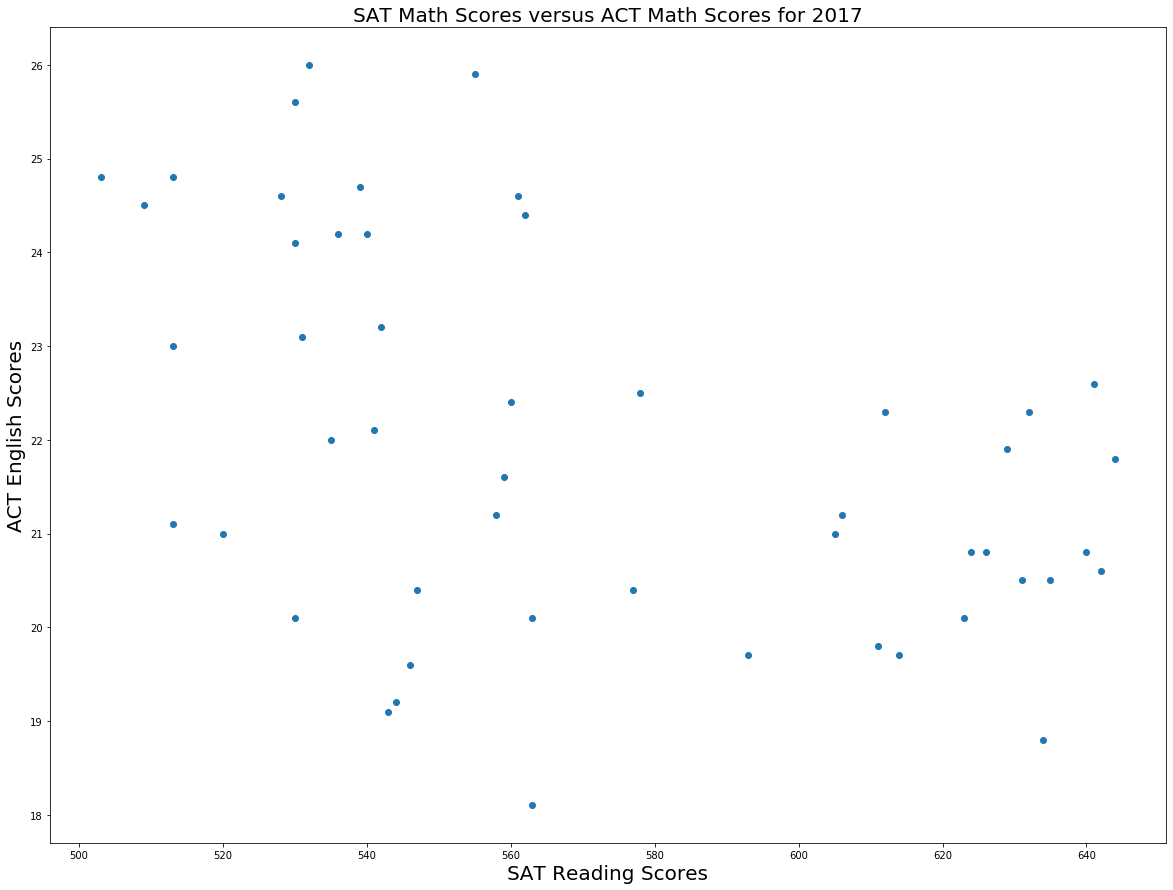

In [92]:
plt.figure(figsize = (20,15))


plt.scatter(final['sat_reading_2017'],
           final['act_reading_2017'])

plt.title("SAT Math Scores versus ACT Math Scores for 2017",size=20)
plt.ylabel("ACT English Scores", fontsize = 12,size=20)
plt.xlabel("SAT Reading Scores", fontsize = 12,size=20);

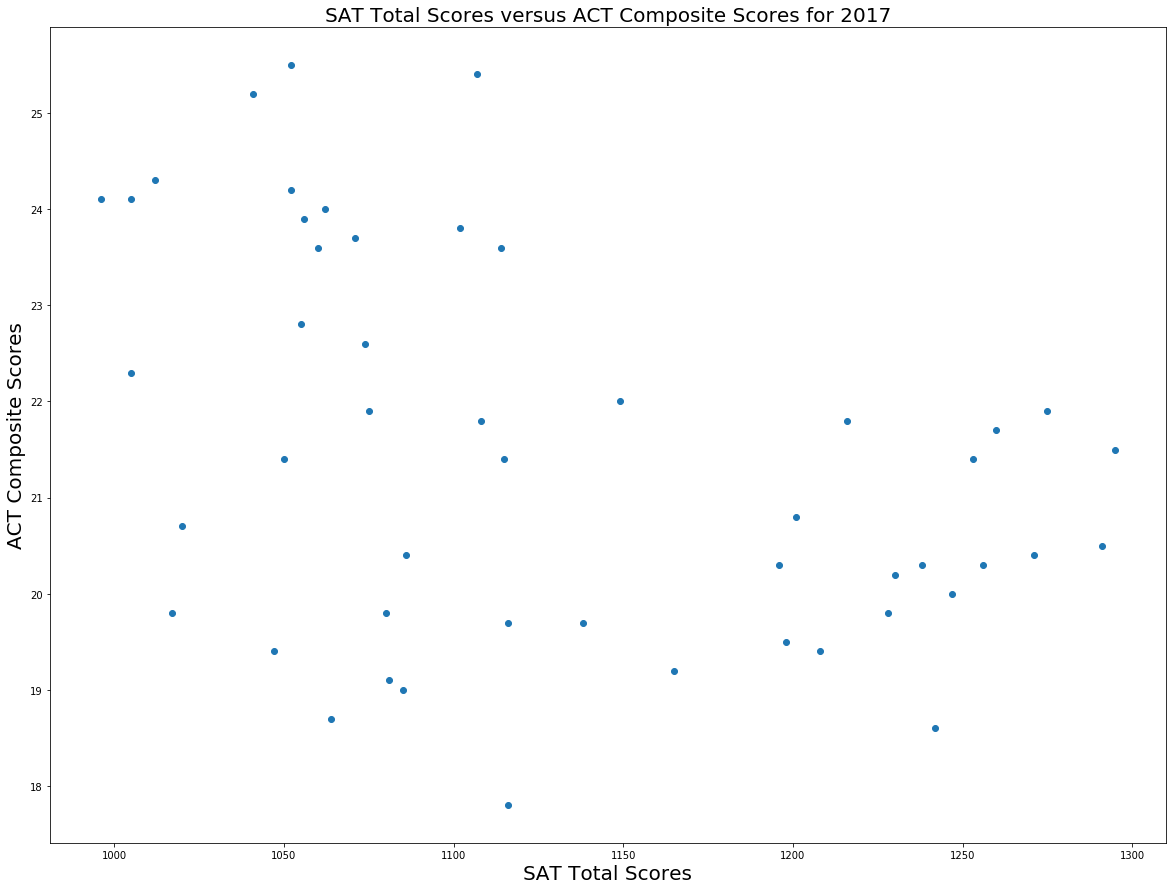

In [93]:
plt.figure(figsize = (20,15))


plt.scatter(final['sat_total_2017'],
           final['act_composite_2017'])

plt.title("SAT Total Scores versus ACT Composite Scores for 2017",size=20)
plt.ylabel("ACT Composite Scores", fontsize = 20)
plt.xlabel("SAT Total Scores", fontsize = 20);

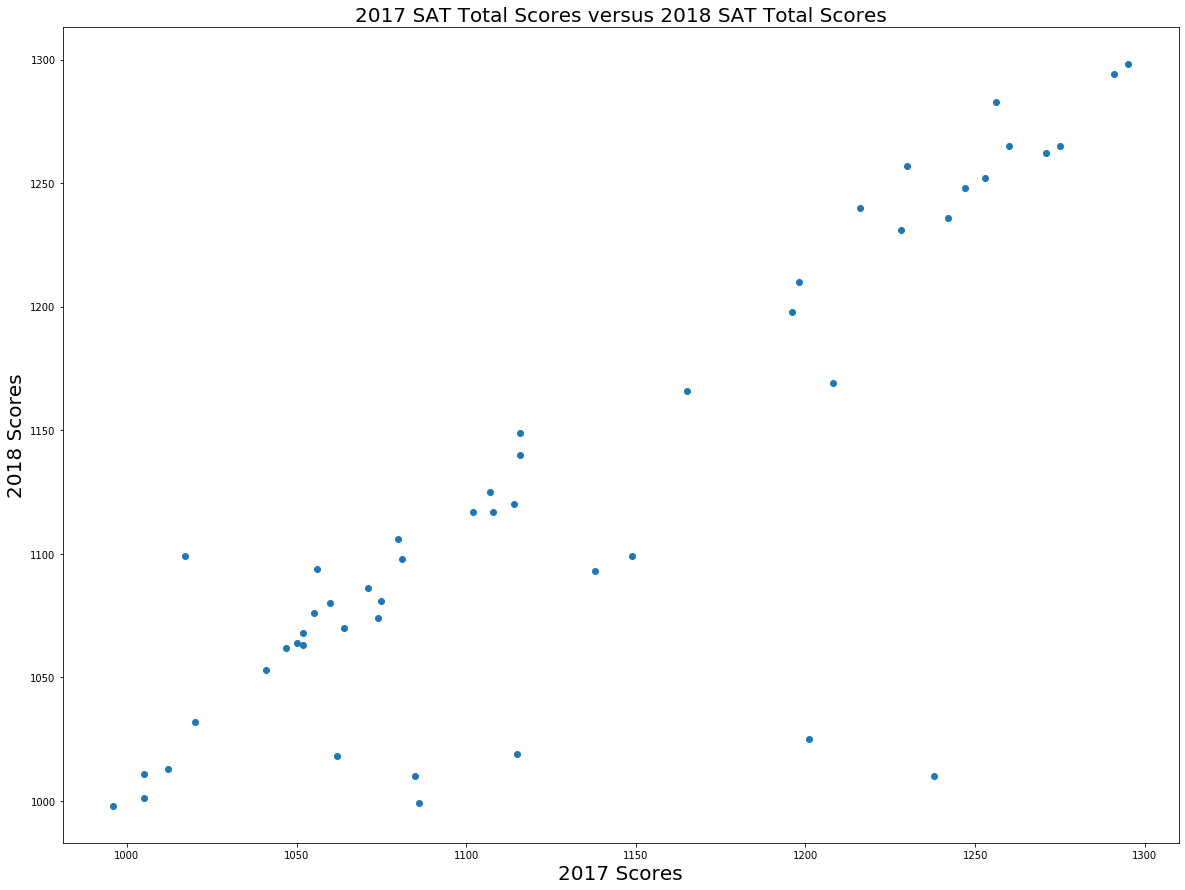

In [94]:
plt.figure(figsize = (20,15))

plt.scatter(final['sat_total_2017'],
           final['sat_total_2018'])

plt.title("2017 SAT Total Scores versus 2018 SAT Total Scores",size=20)
plt.ylabel("2018 Scores", fontsize = 20)
plt.xlabel("2017 Scores", fontsize = 20);

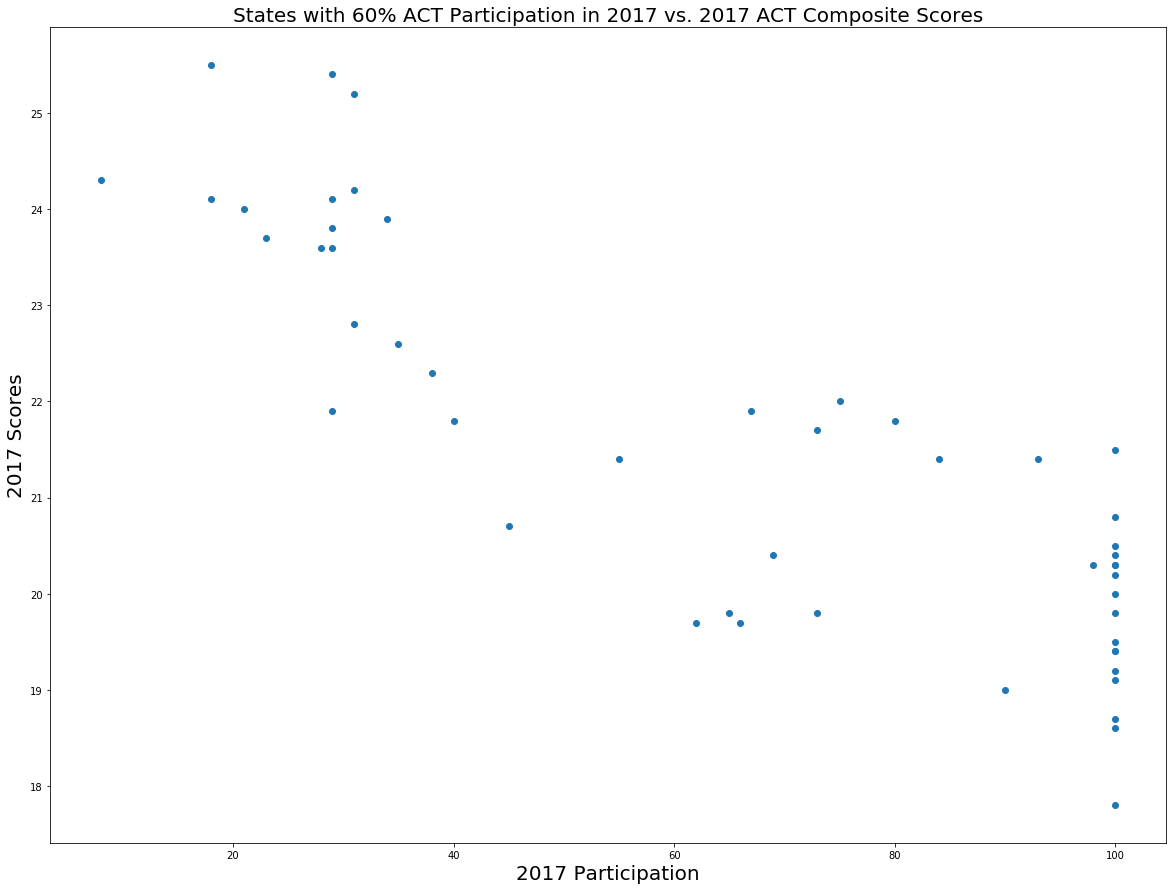

In [95]:
fig = plt.figure(figsize = (20,15))

plt.scatter(final['act_participation_2017'],final['act_composite_2017']);

plt.title("States with 60% ACT Participation in 2017 vs. 2017 ACT Composite Scores",size=20)
plt.ylabel("2017 Scores", fontsize = 20)
plt.xlabel("2017 Participation", fontsize = 20);



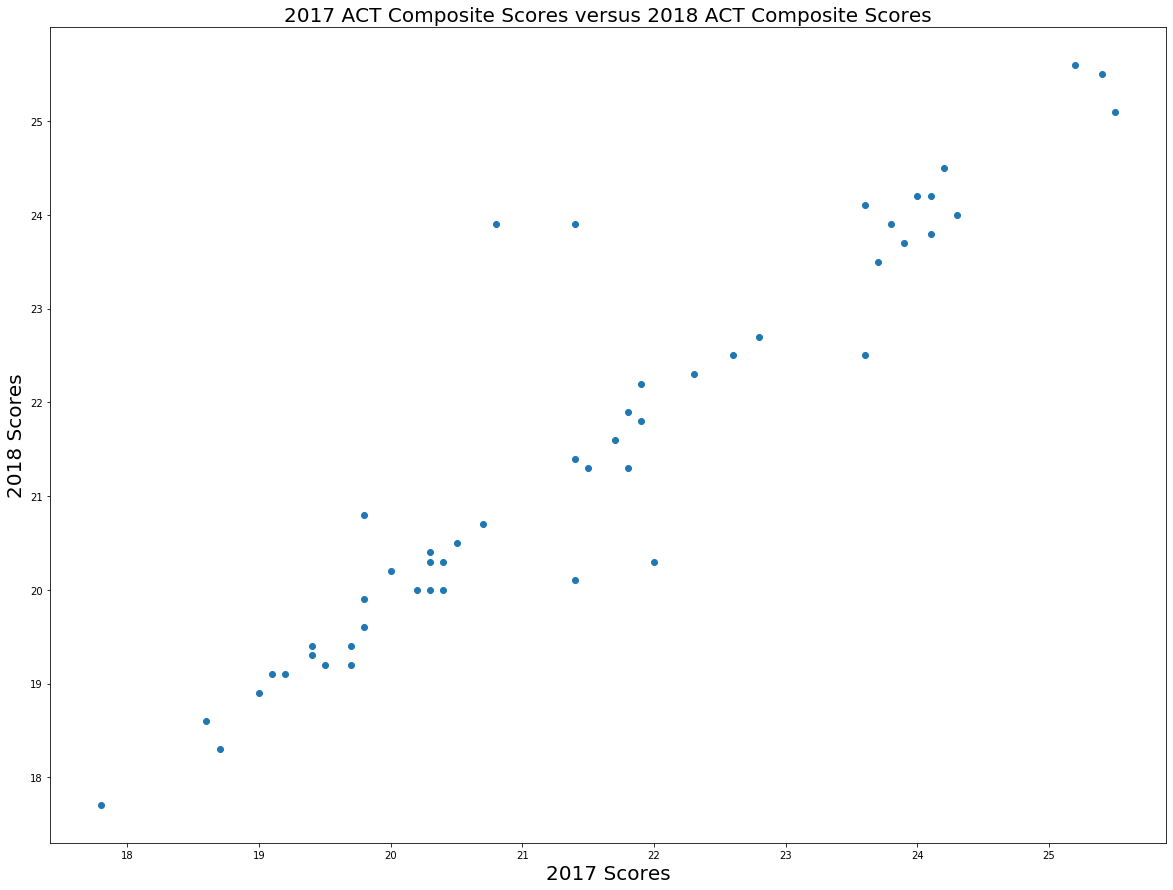

In [96]:
plt.figure(figsize = (20,15));


x=final['act_composite_2017'];
y=final['act_composite_2018'];
plt.scatter(x,y);

plt.title("2017 ACT Composite Scores versus 2018 ACT Composite Scores",size=20);
plt.ylabel("2018 Scores", fontsize = 20);
plt.xlabel("2017 Scores", fontsize = 20);



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

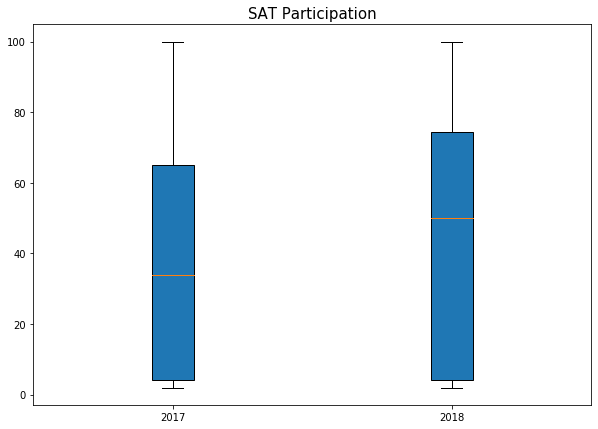

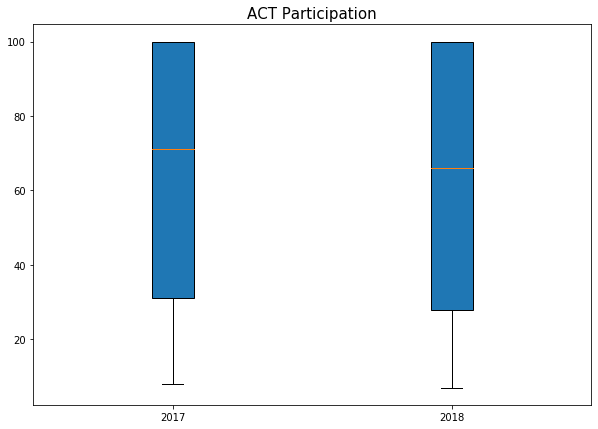

In [98]:
plt.figure(figsize = (10,7))
plt.grid(False)
boxp = [final['sat_participation_2017'], final['sat_participation_2018']]
box = ('2017', '2018')
plt.figure(1)
plt.boxplot(boxp,labels = box, patch_artist=True)
plt.title('SAT Participation',size=15);

plt.figure(figsize = (10,7))
plt.grid(False)
boxp2 = [final['act_participation_2017'], final['act_participation_2018']]
box = ('2017', '2018')
plt.figure(2)
plt.boxplot(boxp2,labels = box, patch_artist=True)
plt.title('ACT Participation',size=15);

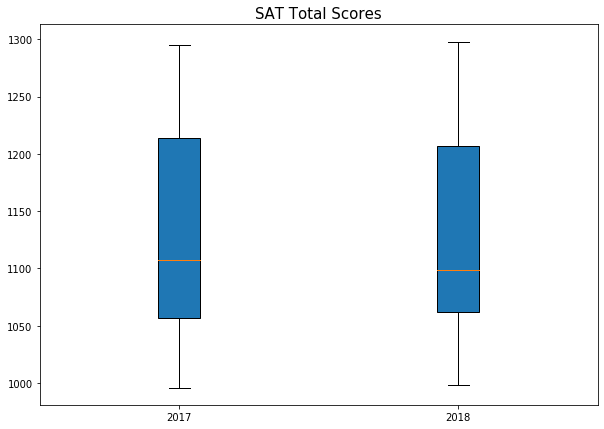

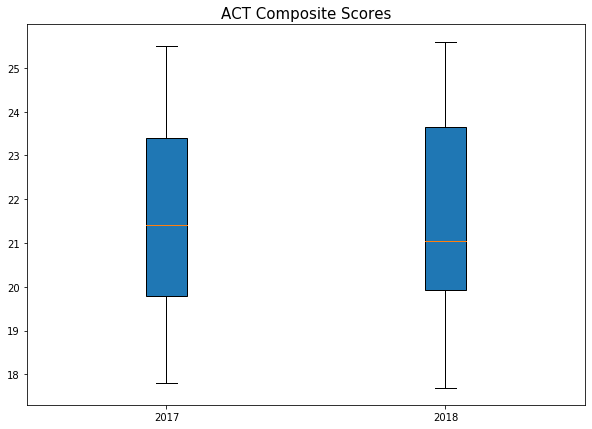

In [99]:
plt.figure(figsize = (10,7))
plt.grid(False)
boxp = [final['sat_total_2017'], final['sat_total_2018']]
box = ('2017', '2018')
plt.figure(1)
plt.boxplot(boxp,labels = box, patch_artist=True)
plt.title('SAT Total Scores',size=15);

plt.figure(figsize = (10,7))
plt.grid(False)
boxp2 = [final['act_composite_2017'], final['act_composite_2018']]
box = ('2017', '2018')
plt.figure(2)
plt.boxplot(boxp2,labels = box, patch_artist=True)
plt.title('ACT Composite Scores',size=15);

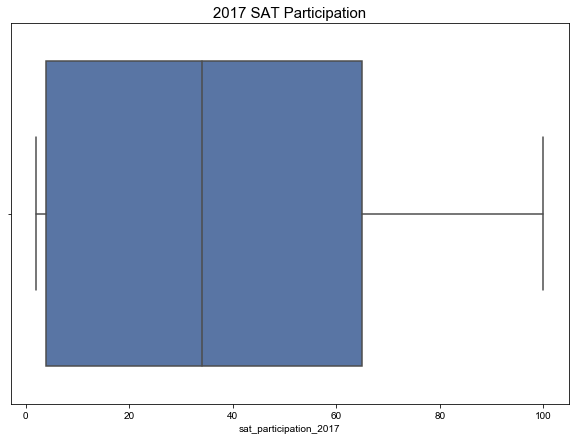

In [100]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_participation_2017']).set_title('2017 SAT Participation',size=15);

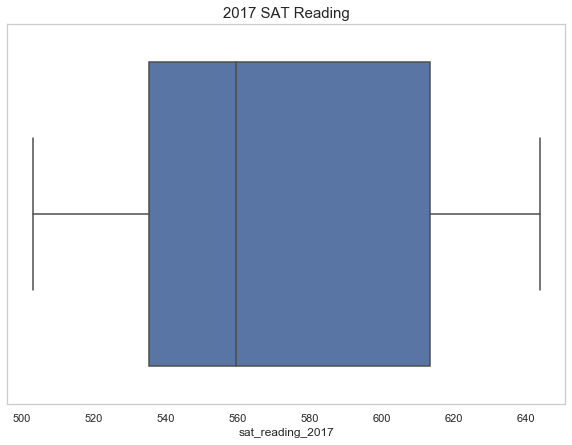

In [101]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_reading_2017']).set_title('2017 SAT Reading',size=15);

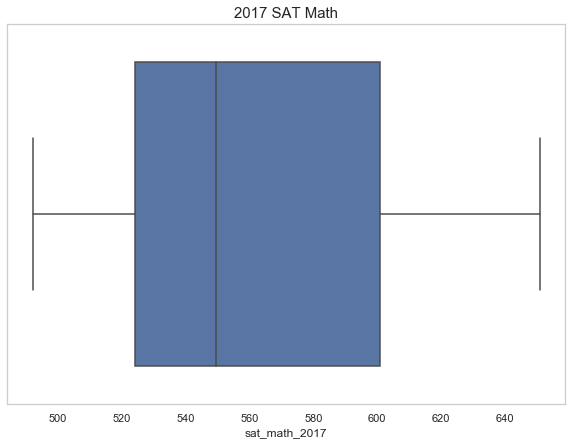

In [102]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_math_2017']).set_title('2017 SAT Math',size=15);

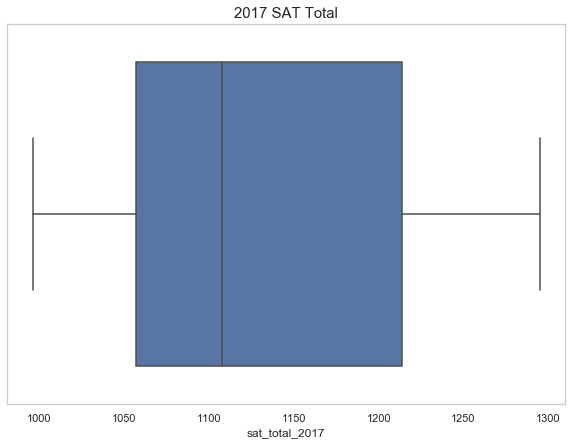

In [103]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_total_2017']).set_title('2017 SAT Total',size=15);

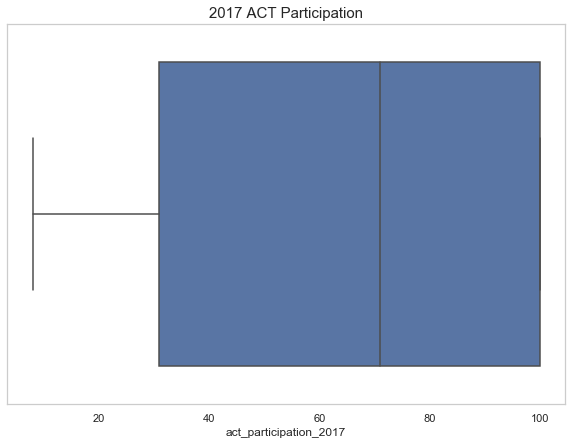

In [104]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_participation_2017']).set_title('2017 ACT Participation',size=15);

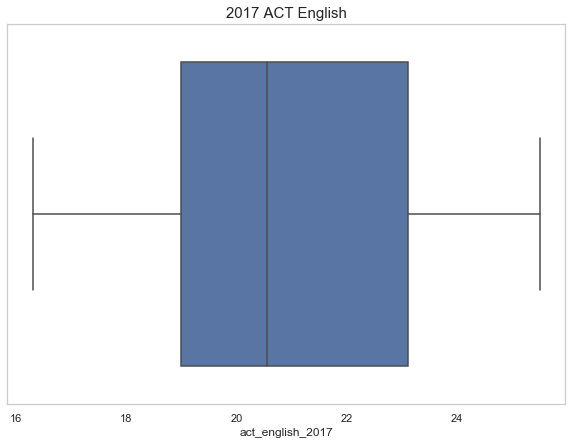

In [105]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_english_2017']).set_title('2017 ACT English',size=15);

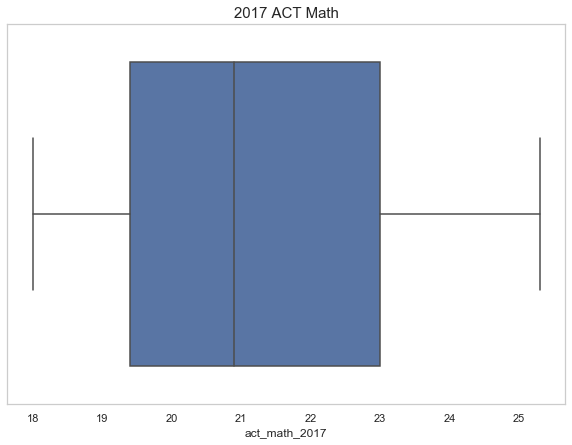

In [106]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_math_2017']).set_title('2017 ACT Math',size=15);

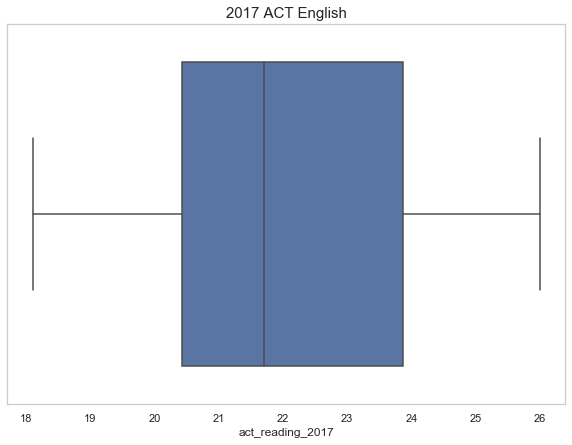

In [107]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_reading_2017']).set_title('2017 ACT English',size=15);

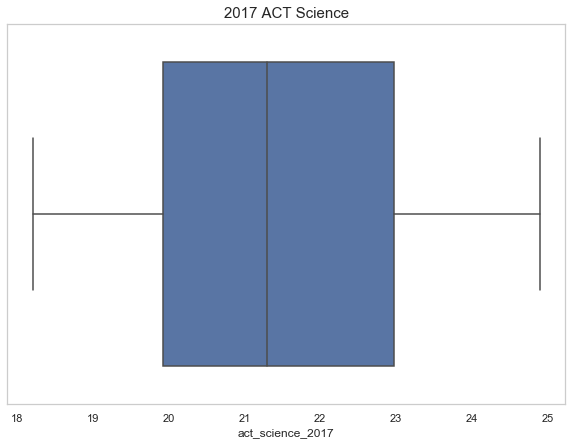

In [108]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_science_2017']).set_title('2017 ACT Science',size=15);

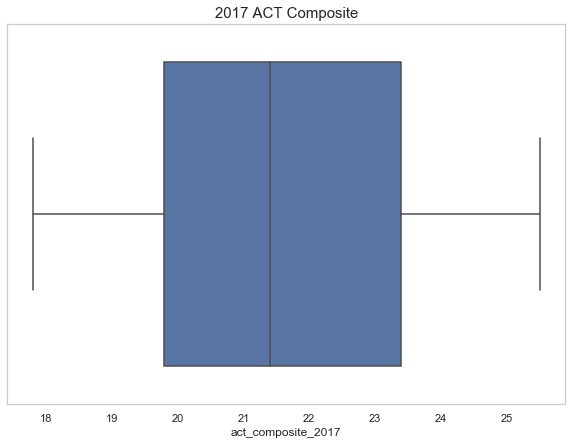

In [109]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_composite_2017']).set_title('2017 ACT Composite',size=15);

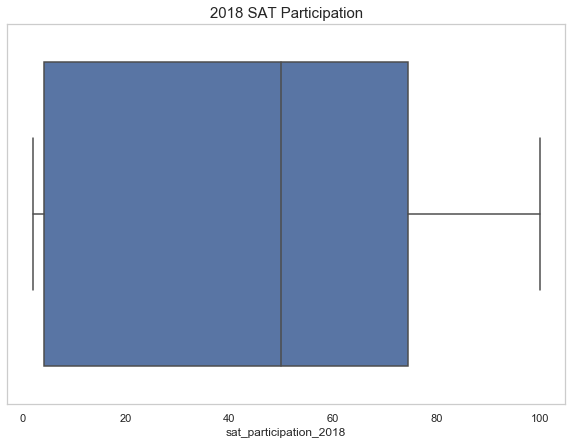

In [110]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_participation_2018']).set_title('2018 SAT Participation',size=15);

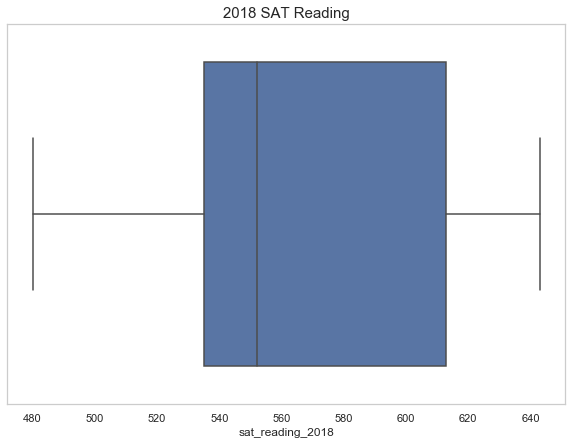

In [111]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_reading_2018']).set_title('2018 SAT Reading',size=15);

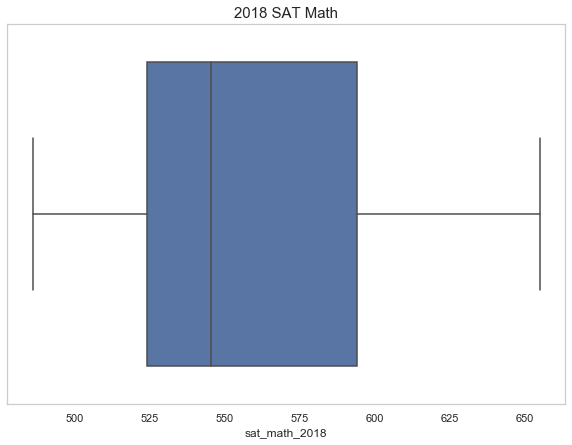

In [112]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_math_2018']).set_title('2018 SAT Math',size=15);

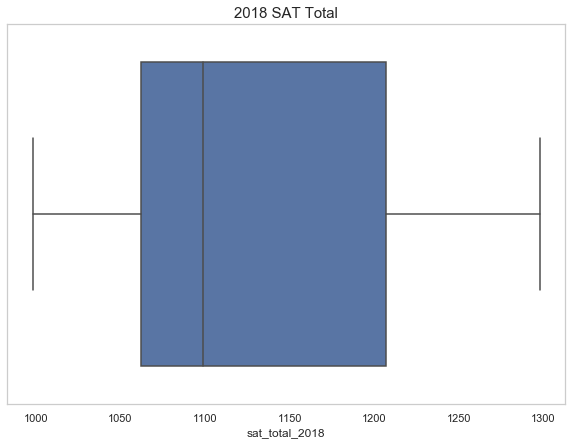

In [113]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['sat_total_2018']).set_title('2018 SAT Total',size=15);

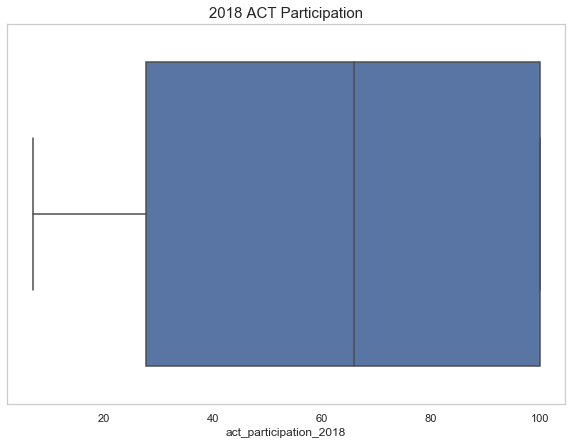

In [114]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_participation_2018']).set_title('2018 ACT Participation',size=15);

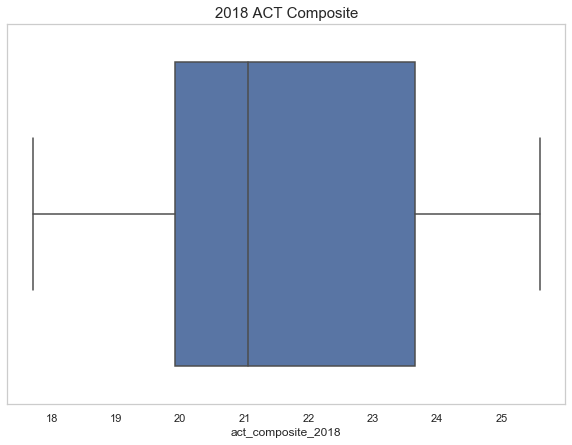

In [115]:
plt.figure(figsize = (10,7))
plt.grid(False)
sns.set(style="whitegrid")
sns.boxplot(final['act_composite_2018']).set_title('2018 ACT Composite',size=15);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The SAT participation rates for both years are skewed to the right.
For 2017 the mean is 38.6, the median is 34 and the standard deviation is 34.6.
For 2018 the mean is 44.8, the median is 50 and the standard deviation is 37.1.

The ACT participation rates for both years are skewed to the left.
For 2017 the mean is 65.9, the median is 71 and the standard deviation is 32.1.
For 2018 the mean is 62.3, the median is 66 and the standard deviation is 34.1.

The SAT math scores for both years are skewed to the right.
For 2017 the mean is 558.7, the median is 549.5 and the standard deviation is 45.8.
For 2018 the mean is 557.8, the median is 545.5 and the standard deviation is 47.0.

The SAT total scores for both years are skewed to the right.
For 2017 the mean is 1129.6, the median is 1107.5 and the standard deviation is 89.9.
For 2018 the mean is 1122.9, the median is 1098.5 and the standard deviation is 92.8.

The ACT composite scores for both years are close to being normally distributed.
For 2017 the mean is 21.5, the median is 21.4 and the standard deviation is 2.0.
For 2018 the mean is 21.5, the median is 21.1 and the standard deviation is 2.1.

The ACT math scores for 2017 is skewed to the right.
The mean is 21.1, the median is 20.9 and the standard deviation is 2.0.

The ACT English scores for 2017 is skewed to the right.
The mean is 22.0, the median is 21.7 and the standard deviation is 2.0.

The ACT science scores for 2017 has somewhat of a normal distribution.
The mean is 21.4, the median is 21.3 and the standard deviation is 1.7.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

None of the distribution are normal.  Some of them are close to being normal.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  As seen in the charts below, most of the curves are close to normal but have some skew to the right.  The ACT English and composite scores are very close to being normal.  If the distribution is normal we can use that to estimate for the population.

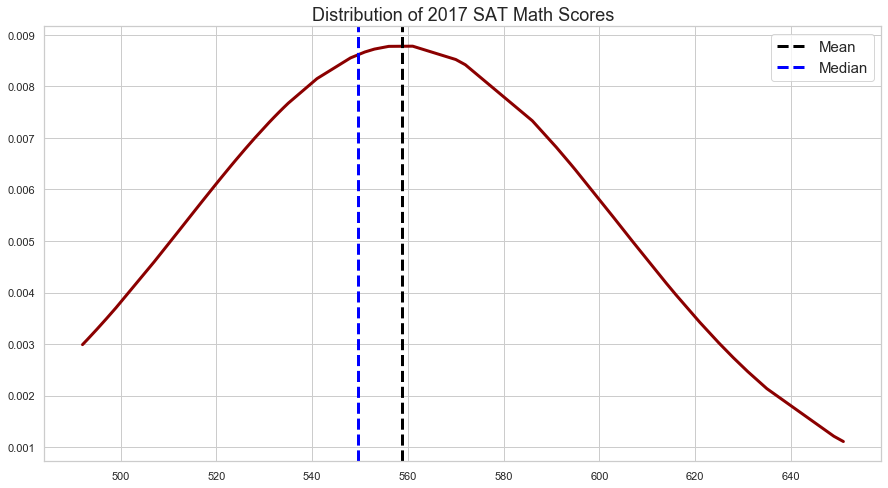

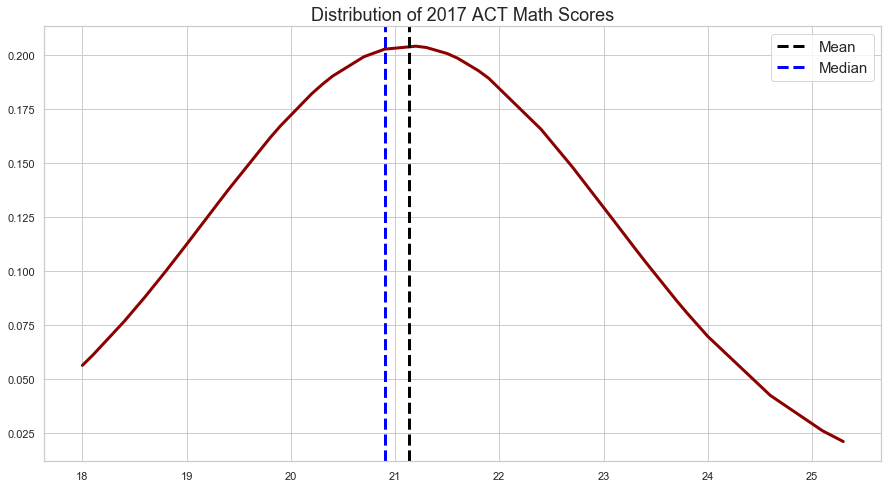

In [116]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(1)
x = sorted(final['sat_math_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 SAT Math Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_math_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_math_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(2)
x = sorted(final['act_math_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 ACT Math Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_math_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_math_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

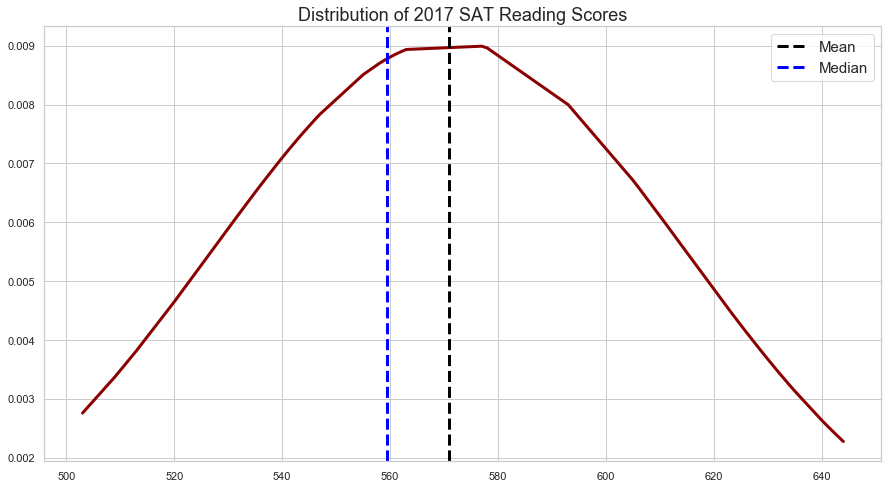

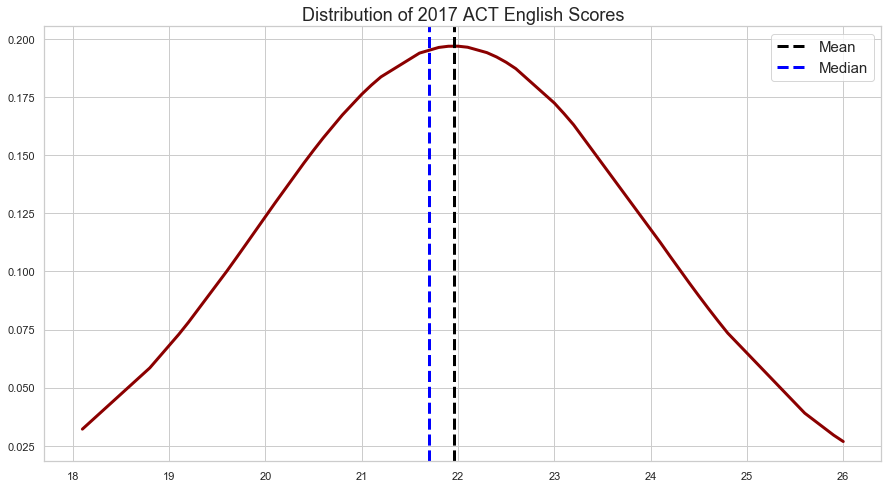

In [117]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(1)
x = sorted(final['sat_reading_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 SAT Reading Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_reading_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_reading_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(2)
x = sorted(final['act_reading_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 ACT English Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_reading_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_reading_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});


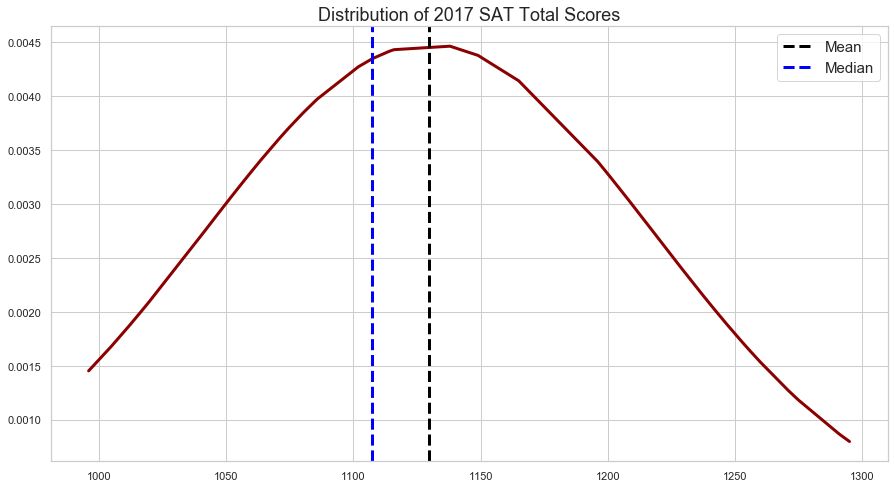

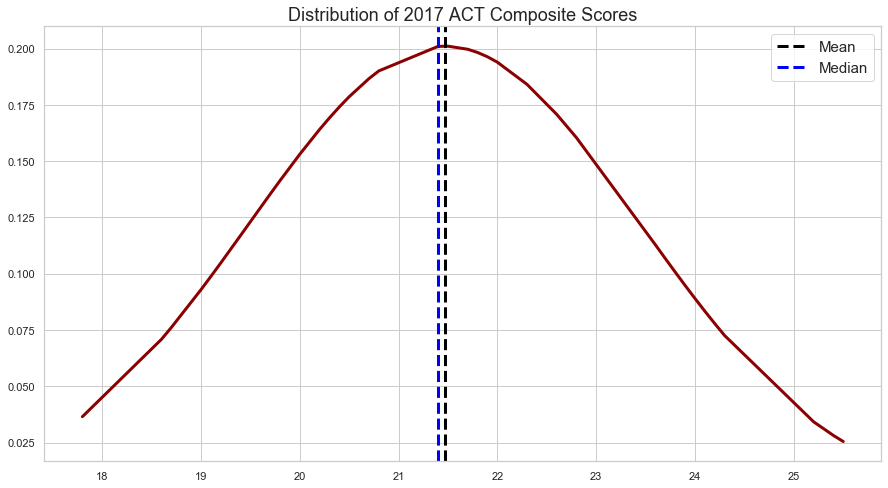

In [118]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(1)
x = sorted(final['sat_total_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 SAT Total Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_total_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_total_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(2)
x = sorted(final['act_composite_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 ACT Composite Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_composite_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_composite_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});


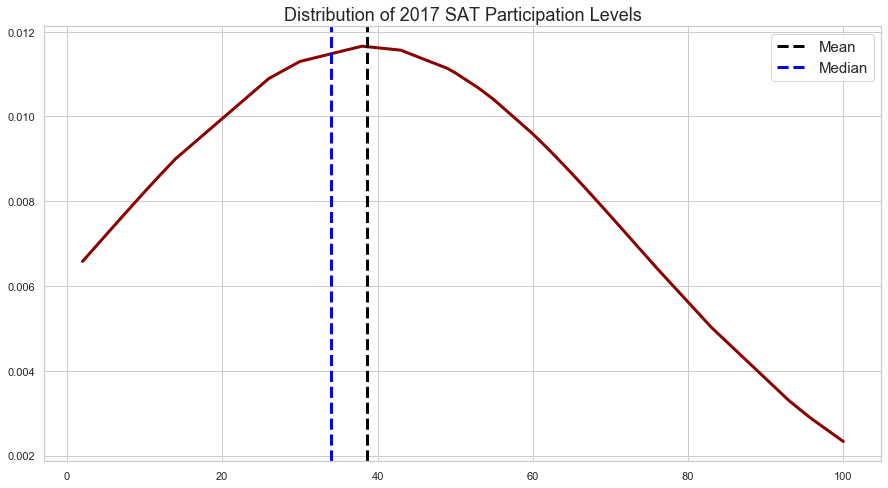

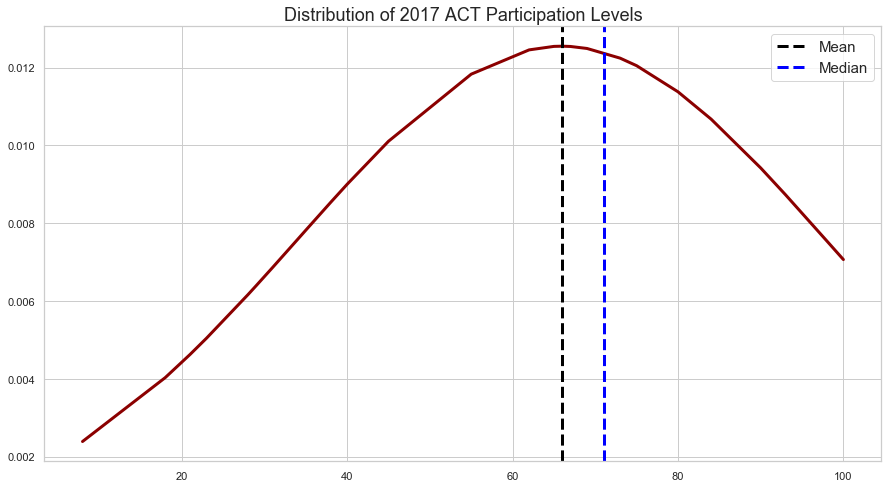

In [119]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(1)
x = sorted(final['sat_participation_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 SAT Participation Levels', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_participation_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_participation_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(2)
x = sorted(final['act_participation_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 ACT Participation Levels', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_participation_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_participation_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

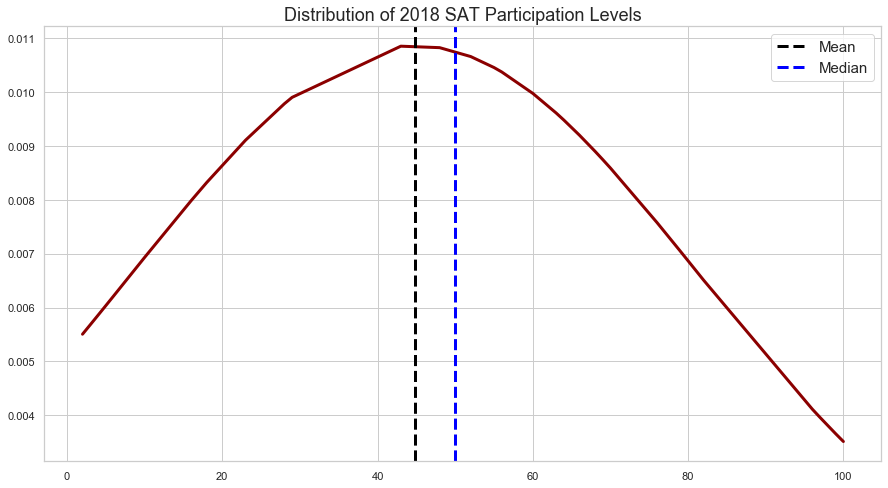

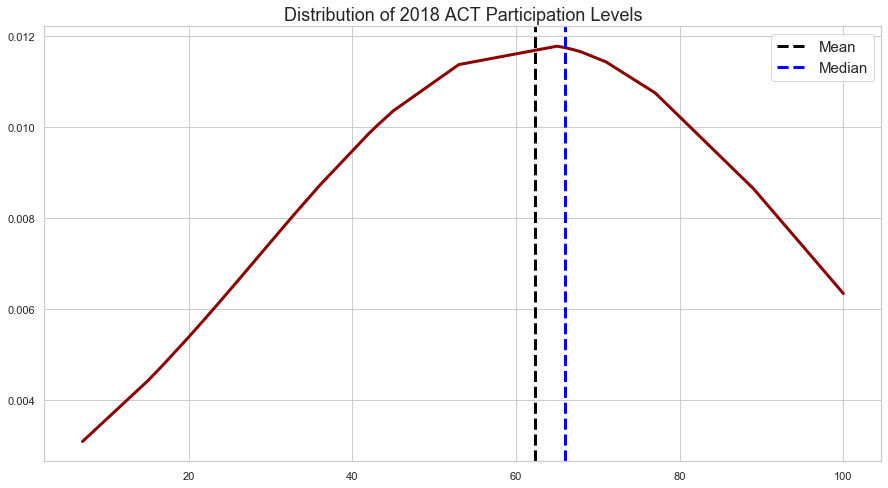

In [120]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(1)
x = sorted(final['sat_participation_2018'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2018 SAT Participation Levels', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_participation_2018'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_participation_2018'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(2)
x = sorted(final['act_participation_2018'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2018 ACT Participation Levels', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_participation_2018'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_participation_2018'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

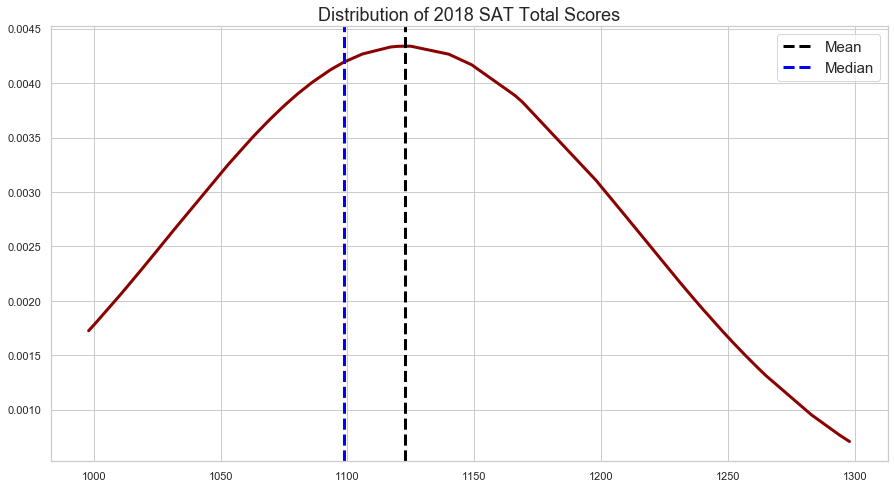

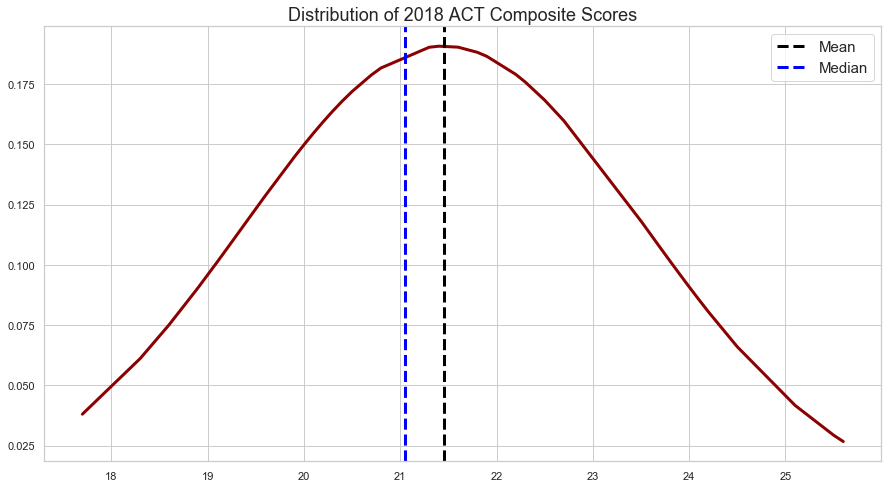

In [121]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(1)
x = sorted(final['sat_total_2018'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2018 SAT Total Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_total_2018'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_total_2018'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.figure(2)
x = sorted(final['act_composite_2018'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2018 ACT Composite Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_composite_2018'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_composite_2018'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

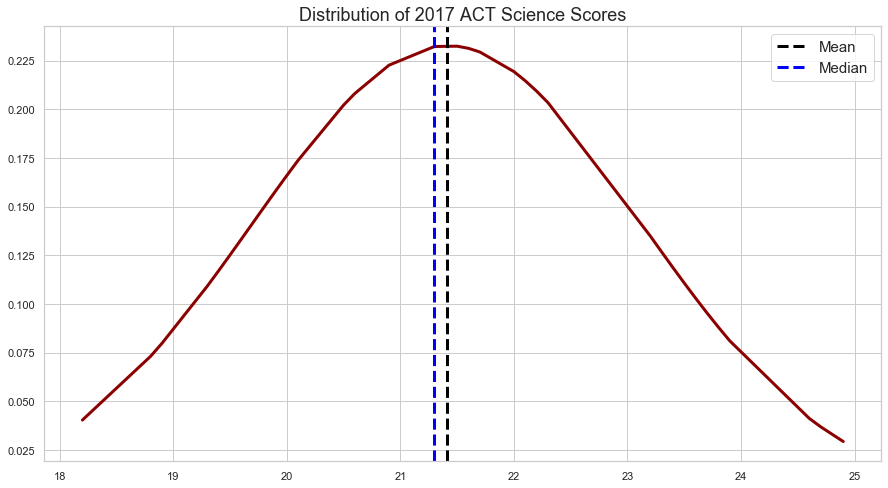

In [122]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

x = sorted(final['act_science_2017'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2017 ACT Science Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['act_science_2017'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['act_science_2017'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

In [123]:
final.columns

Index(['state', 'sat_participation_2017', 'sat_reading_2017', 'sat_math_2017',
       'sat_total_2017', 'act_participation_2017', 'act_english_2017',
       'act_math_2017', 'act_reading_2017', 'act_science_2017',
       'act_composite_2017', 'sat_participation_2018', 'sat_reading_2018',
       'sat_math_2018', 'sat_total_2018', 'act_participation_2018',
       'act_composite_2018'],
      dtype='object')

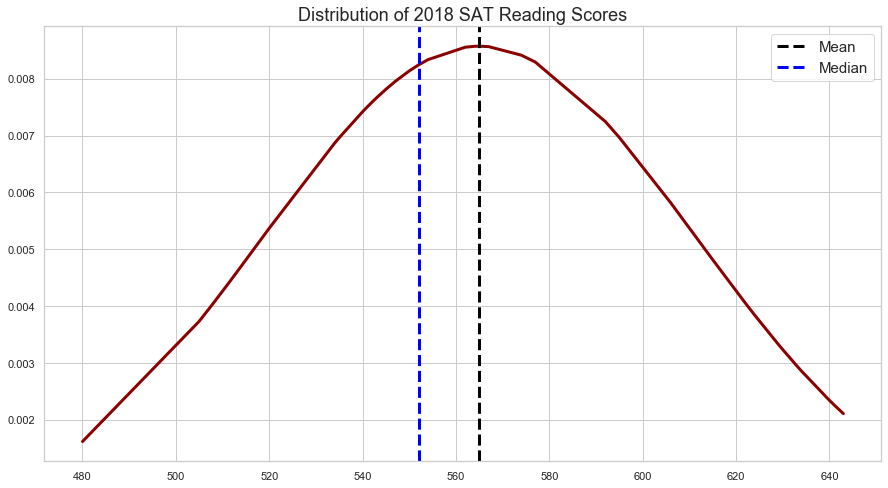

In [124]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

x = sorted(final['sat_reading_2018'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2018 SAT Reading Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_reading_2018'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_reading_2018'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

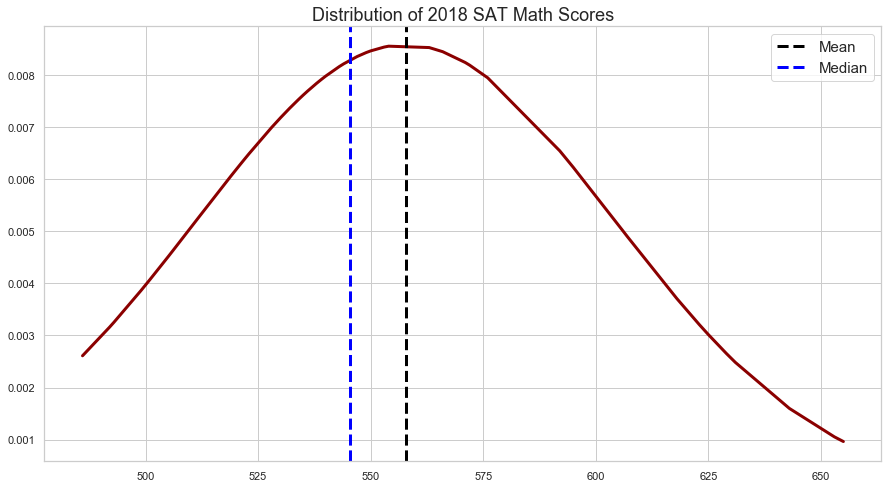

In [125]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

x = sorted(final['sat_math_2018'])
y = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.title('Distribution of 2018 SAT Math Scores', size=18)
plt.plot(x,y, linewidth=3, color='darkred');

ax.axvline(final['sat_math_2018'].mean(),color='black', linestyle='--', lw=3, label='Mean');
ax.axvline(final['sat_math_2018'].median(),color='blue', linestyle='--', lw=3, label='Median');
ax.legend(loc='upper right', prop={'size': 15});

Does it make sense to conduct statistical inference given these data specifically?
Why or why not?
(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)

Answer: I would not rely on these two values to conduct a statistical inference.  State level may not be specific enough.  I would be more interested in see data on a more micro level such as by county or city.  The population size and ethnic make up  of states varies widely.  I might like compare states that have similar attributes or make up.  I would like to add additional data points to take into account the differnces in population from state to stat.  In addtion, 17 states require students to take the ACT exam (source: https://bit.ly/2KJZEwn).

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

I would not compare the math scores because they may be weighted by the population of the state where the SAT or ACT has a greater market share.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [126]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado's SAT participation rate was 11% in 2017 and jumped to 100% in 2018.  This was due to Colorado changing having the ACT test as manadatory to SAT in 2018.(source: https://www.testive.com/colorado-sat-change-2017/)

Similarly, Illinios's ACT participation level was 93% in 2017 and 43% in 2018.  They also changed from having the ACT as mandatory to the SAT.

Nevada had the lowest scores nationally in both of the years we looked at, 17.8 in 2017 and 17.7 in 2018.  The national average scores in these years were 21.466 and 21.454 with standard deviations of 1.984 and 2.090, respectively.  This puts them about 2 standard deviations away from the mean.  The test is manadatory for high school student in Nevada.  Nevada has consistently had the lowest scores nationally (source:https://www.reviewjournal.com/news/education/nevada-sets-bar-lower-for-11th-graders-taking-act/).  A direct cause for the low scores has not been established.  It may be linked to a higher percentage of students living below the poverty and a large minority population.  These two groups of students tend to have lower scores.  USA today has ranked Nevada as having the worst schools in the country (source: https://www.usatoday.com/story/money/economy/2018/02/08/geographic-disparity-states-best-and-worst-schools/1079181001/)

## Conclusions and Recommendations

In [127]:
final[final['state'] == 'California']

,state,sat_participation_2017,sat_reading_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The SAT's highest participation rates are mainly in the east while the ACT has higher participation rates in the midwest and south.  The ACT is mandatory in Alabama, Montana, Nevada, North Carolina, North Dakota, Utah, Wisconsin, Kentucky, Louisiana, Mississippi, Nebraska and Wyoming (source: https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice).  The SAT is mandatory in Colorado, Connecticut, Illinios and Delaware (source: https://blog.prepscholar.com/which-states-require-the-sat).

California probably represents the best market to target. It has the largest population of students and with participation rates at 60% in 2018 there is plenty of room for growth.

I would like to analyze data on the actual number of students taking the test and the overall population of students who might be taking the test.  The data looks at the percentage of students in a state taking either test.  It does not show the overall percentage of students taking either test.  The data also does not look at international students who take the test.

There is also no data on students who take both tests.